In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import os
from paths import *

In [ ]:
## Setting current work directory for relative paths
os.chdir(CURRENT_WD)

In [2]:
def separate_model_mode(x):

    is_random = False
    mode = 'base'
    ft_ds = 'None'
    id = 'base'

    x = x.split('_')
    
    if('random' in x):
        is_random = True
        id = 'random'
    if('FT' in x):
        mode = 'FT'
        if('imdb' in x):
            ft_ds = 'imdb'
        elif('4chan' in x):
            ft_ds = '4chan'
        
        id+='_'+ft_ds
    
    return is_random,mode,ft_ds,id

In [3]:
scores = pd.read_excel((RESULTS_PATH + 'master_results.xlsx'),sheet_name=None)

In [45]:
scores['consolidated']

,ts,model_tag,model_dir,ft_epochs,metric,score
0,2024-02-09 20:46:39,bert-base-uncased,NaN,NaN,crows-pairs,60.480000
1,2024-02-09 20:47:38,bert-base-uncased,NaN,NaN,stereoset,68.162956
2,2024-02-09 20:52:23,bert-base-uncased,NaN,NaN,crows-pairs,60.480000
3,2024-02-09 20:53:24,bert-base-uncased,NaN,NaN,stereoset,68.162956
4,2024-02-09 20:58:11,bert-base-uncased,NaN,NaN,crows-pairs,60.480000
...,...,...,...,...,...,...
1039,2024-01-12 07:48:55,distilbert-base-uncased_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/disti...,10.0,ceat,0.627804
1040,2024-01-03 07:24:58,distilbert-base-uncased_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/disti...,10.0,ceat,0.606975
1041,2024-01-12 08:51:36,distilbert-base-uncased_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/disti...,10.0,ceat,0.603559
1042,2024-03-11 19:14:02,albert-base-v2_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,15.0,ceat,0.398785


In [46]:
cons = scores['consolidated']
cons.head()

,ts,model_tag,model_dir,ft_epochs,metric,score
0,2024-02-09 20:46:39,bert-base-uncased,NaN,NaN,crows-pairs,60.480000
1,2024-02-09 20:47:38,bert-base-uncased,NaN,NaN,stereoset,68.162956
2,2024-02-09 20:52:23,bert-base-uncased,NaN,NaN,crows-pairs,60.480000
3,2024-02-09 20:53:24,bert-base-uncased,NaN,NaN,stereoset,68.162956
4,2024-02-09 20:58:11,bert-base-uncased,NaN,NaN,crows-pairs,60.480000


In [47]:
cons['ft_epochs'] = cons['ft_epochs'].fillna(0)

In [48]:
cons.head()

,ts,model_tag,model_dir,ft_epochs,metric,score
0,2024-02-09 20:46:39,bert-base-uncased,NaN,0.0,crows-pairs,60.480000
1,2024-02-09 20:47:38,bert-base-uncased,NaN,0.0,stereoset,68.162956
2,2024-02-09 20:52:23,bert-base-uncased,NaN,0.0,crows-pairs,60.480000
3,2024-02-09 20:53:24,bert-base-uncased,NaN,0.0,stereoset,68.162956
4,2024-02-09 20:58:11,bert-base-uncased,NaN,0.0,crows-pairs,60.480000


In [53]:
cons = cons[['model_tag','ft_epochs','metric','score']].groupby(['model_tag','metric','ft_epochs']).mean().reset_index()
cons.head()

,model_tag,metric,ft_epochs,score
0,albert-base-v2,ceat,0.0,0.096925
1,albert-base-v2,crows-pairs,0.0,56.760000
2,albert-base-v2,stereoset,0.0,70.350657
3,albert-base-v2_FT_4chan,ceat,5.0,0.875832
4,albert-base-v2_FT_4chan,ceat,10.0,0.864487


In [54]:
cons['base_model_tag'] = cons['model_tag'].apply(lambda x : x.split('_')[0])
# cons['model_mode'] = cons['model_tag'].apply(lambda x : separate_model_mode(x))
cons['is_random'],cons['model_mode'],cons['ft_ds'],cons['model_id'] = zip(*cons['model_tag'].map(separate_model_mode))

In [55]:
cons.head()

,model_tag,metric,ft_epochs,score,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,ceat,0.0,0.096925,albert-base-v2,False,base,None,base
1,albert-base-v2,crows-pairs,0.0,56.760000,albert-base-v2,False,base,None,base
2,albert-base-v2,stereoset,0.0,70.350657,albert-base-v2,False,base,None,base
3,albert-base-v2_FT_4chan,ceat,5.0,0.875832,albert-base-v2,False,FT,4chan,base_4chan
4,albert-base-v2_FT_4chan,ceat,10.0,0.864487,albert-base-v2,False,FT,4chan,base_4chan


In [56]:
cons['model_id'].unique()

array(['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan',
       'random_imdb'], dtype=object)

In [57]:
cons.head()

,model_tag,metric,ft_epochs,score,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,ceat,0.0,0.096925,albert-base-v2,False,base,None,base
1,albert-base-v2,crows-pairs,0.0,56.760000,albert-base-v2,False,base,None,base
2,albert-base-v2,stereoset,0.0,70.350657,albert-base-v2,False,base,None,base
3,albert-base-v2_FT_4chan,ceat,5.0,0.875832,albert-base-v2,False,FT,4chan,base_4chan
4,albert-base-v2_FT_4chan,ceat,10.0,0.864487,albert-base-v2,False,FT,4chan,base_4chan


In [ ]:
# cons.groupby(['metric','model_id'])

In [68]:
df = cons.loc[cons['ft_epochs'].isin([0,20])].sort_values(['metric','model_id'])
df.loc[df['is_random']==False].pivot(index='base_model_tag',columns=['metric','model_id'],values='score')
df.loc[df['is_random']==False].pivot(index='base_model_tag',columns=['metric','model_id'],values='score').to_excel('../data/results/presentation/consolidated_pretrained.xlsx',index=True)

In [69]:
df.loc[df['is_random']==True].pivot(index='base_model_tag',columns=['metric','model_id'],values='score')
df.loc[df['is_random']==True].pivot(index='base_model_tag',columns=['metric','model_id'],values='score').to_excel('../data/results/presentation/consolidated_random.xlsx',index=True)

In [287]:
df = cons.loc[cons['ft_epochs'].isin([0,20]),['metric','score','model_id']].pivot(index='model_id',columns='metric',values='score')
# df.to_excel('../data/results/presentation/cons_overall.xlsx',index=True)
df

metric,ceat,crows-pairs,stereoset
model_id,,,
base,0.455819,56.6320,67.579259
base_4chan,0.654807,55.9820,66.100130
base_imdb,0.526417,56.6960,66.858488
random,0.191170,50.0896,48.358542
random_4chan,0.094463,53.6980,46.171001
random_imdb,0.147958,48.7796,57.926365


In [293]:
diff = pd.read_excel('../data/results/presentation/cons_overall_diff.xlsx')
diff

,setup,ceat,crows-pairs,stereoset,origin
0,base_4chan,0.436551,-0.011478,-0.021887,base
1,base_imdb,0.154881,0.001130,-0.010666,base
2,random_4chan,-0.505871,0.072039,-0.045236,random
3,random_imdb,0.566314,-0.091594,0.254605,random


In [302]:
diff_long = pd.melt(diff, id_vars=['setup', 'origin'], value_vars=['ceat', 'crows-pairs', 'stereoset'],
                    var_name='metric', value_name='score')
diff_long['score'] = diff_long['score']*100

In [311]:
diff_long = diff_long.rename(columns = {'setup':'Model Setup', 'score':'% difference'})

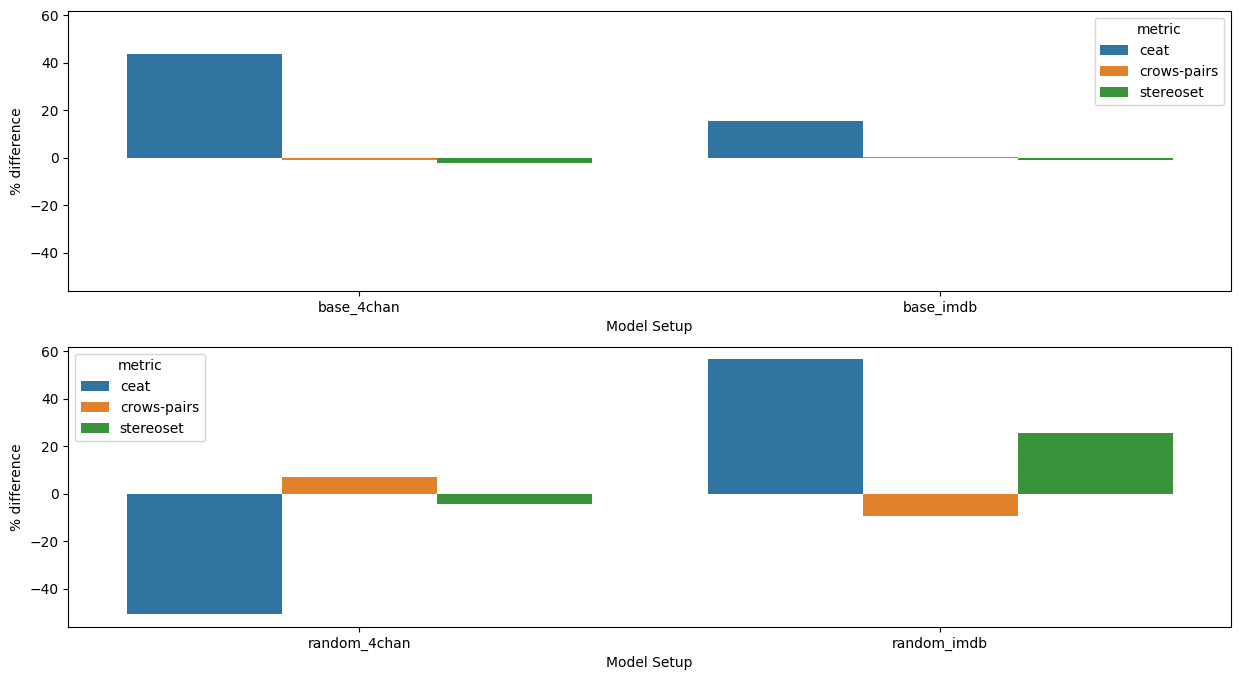

In [312]:
fig, ax = plt.subplots(2,1, figsize=(15, 8),sharey=True)

sns.barplot(x='Model Setup',y='% difference',hue='metric',data=diff_long.loc[diff_long['origin']=='base'], ax = ax[0])
sns.barplot(x='Model Setup',y='% difference',hue='metric',data=diff_long.loc[diff_long['origin']=='random'], ax = ax[1])
plt.savefig('../data/results/presentation/overall_diff.png')
plt.show()

## Crows-Pairs

In [4]:
cp = scores['crows-pairs']
temp = cp.copy()
cp.shape

(450, 10)

In [5]:
cp.groupby(['model_name', 'ft_epochs']).size().reset_index(name='count')

,model_name,ft_epochs,count
0,albert-base-v2_FT_4chan,5.0,5
1,albert-base-v2_FT_4chan,10.0,5
2,albert-base-v2_FT_4chan,15.0,5
3,albert-base-v2_FT_4chan,20.0,5
4,albert-base-v2_FT_imdb,5.0,5
...,...,...,...
75,roberta-base_random_init_FT_4chan,20.0,5
76,roberta-base_random_init_FT_imdb,5.0,5
77,roberta-base_random_init_FT_imdb,10.0,5
78,roberta-base_random_init_FT_imdb,15.0,5


In [6]:
pd.unique(cp['ft_epochs'])

array([nan,  5., 10., 15., 20.])

In [7]:
cp['ft_epochs'] = cp['ft_epochs'].fillna(0) ### Filling NaNs with 21
cp = cp.sort_values(['model_name','ft_epochs']).reset_index(drop=True)
cp = cp.drop(['ts','model_dir','metric'],axis=1)
cp = cp.groupby(['model_name','ft_epochs']).mean().reset_index()

In [8]:
# cp = scores['crows-pairs']
## Dropping all duplicated rows
# cp = cp.drop_duplicates(subset=['model_name','metric'],keep='last').sort_values('model_name').reset_index(drop = True)
cp['base_model_tag'] = cp['model_name'].apply(lambda x : x.split('_')[0])
cp['is_random'],cp['model_mode'],cp['ft_ds'],cp['model_id'] = zip(*cp['model_name'].map(separate_model_mode))
cp.head()

,model_name,ft_epochs,total_examples,metric_score,stereotype_score,anti-stereotype_score:,num_neutral,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,1508.0,56.76,56.20,60.09,0.0,albert-base-v2,False,base,None,base
1,albert-base-v2_FT_4chan,5.0,1508.0,51.59,52.40,47.00,1.0,albert-base-v2,False,FT,4chan,base_4chan
2,albert-base-v2_FT_4chan,10.0,1508.0,53.85,53.57,55.50,0.0,albert-base-v2,False,FT,4chan,base_4chan
3,albert-base-v2_FT_4chan,15.0,1508.0,54.18,53.72,56.88,0.0,albert-base-v2,False,FT,4chan,base_4chan
4,albert-base-v2_FT_4chan,20.0,1508.0,54.11,53.72,56.68,1.0,albert-base-v2,False,FT,4chan,base_4chan


In [9]:
cp.shape

(90, 12)

In [10]:
cp['ft_epochs'].unique()

array([ 0.,  5., 10., 15., 20.])

In [11]:
## Using only the final finetuned models
cp.loc[(cp['ft_epochs'].isin([0,20]))].shape

(30, 12)

In [12]:
# cp.loc[(cp['ft_epochs'].isin([0,20]))][['metric_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='metric_score').to_excel('../data/results/presentation/cp_metric_overall.xlsx')
cp.loc[(cp['ft_epochs'].isin([0,20]))][['metric_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='metric_score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,56.76,54.11,55.50,48.940,51.53,47.680
bert-base-cased,55.11,55.64,53.58,52.650,53.25,50.730
bert-base-uncased,60.48,57.69,60.21,50.118,52.77,47.548
distilbert-base-uncased,56.83,56.37,58.82,49.730,58.42,50.330
roberta-base,53.98,56.10,55.37,49.010,52.52,47.610


In [14]:
# cp.loc[(cp['ft_epochs'].isin([0,20]))][['stereotype_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='stereotype_score').to_excel('../data/results/presentation/cp_stereotype_overall.xlsx')
cp.loc[(cp['ft_epochs'].isin([0,20]))][['stereotype_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='stereotype_score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,56.20,53.72,55.35,49.690,54.300,49.430
bert-base-cased,55.89,56.20,55.08,53.390,55.430,51.440
bert-base-uncased,61.09,58.14,61.49,49.866,54.504,47.414
distilbert-base-uncased,57.33,56.59,58.91,49.690,61.960,50.040
roberta-base,54.50,57.44,56.12,49.530,54.080,47.550


In [18]:
# cp.loc[(cp['ft_epochs'].isin([0,20]))][['anti-stereotype_score:','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='anti-stereotype_score:').to_excel('../data/results/presentation/cp_anti_stereotype_overall.xlsx')
cp.loc[(cp['ft_epochs'].isin([0,20]))][['anti-stereotype_score:','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='anti-stereotype_score:')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,60.09,56.68,56.42,46.760,48.11,52.660
bert-base-cased,50.46,52.29,44.95,49.540,41.01,47.250
bert-base-uncased,56.88,55.05,53.21,52.628,42.99,49.492
distilbert-base-uncased,54.13,55.05,58.53,50.920,38.07,53.210
roberta-base,50.92,48.17,50.92,46.330,44.04,48.620


In [15]:
cp_long = pd.melt(cp.loc[(cp['ft_epochs'].isin([0,20]))],value_vars=['metric_score','stereotype_score','anti-stereotype_score:'],id_vars=['model_name','base_model_tag','model_id'],
                  var_name = 'Score Type')
cp_long.head()

,model_name,base_model_tag,model_id,Score Type,value
0,albert-base-v2,albert-base-v2,base,metric_score,56.76
1,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,metric_score,54.11
2,albert-base-v2_FT_imdb,albert-base-v2,base_imdb,metric_score,55.50
3,albert-base-v2_random_init,albert-base-v2,random,metric_score,48.94
4,albert-base-v2_random_init_FT_4chan,albert-base-v2,random_4chan,metric_score,51.53


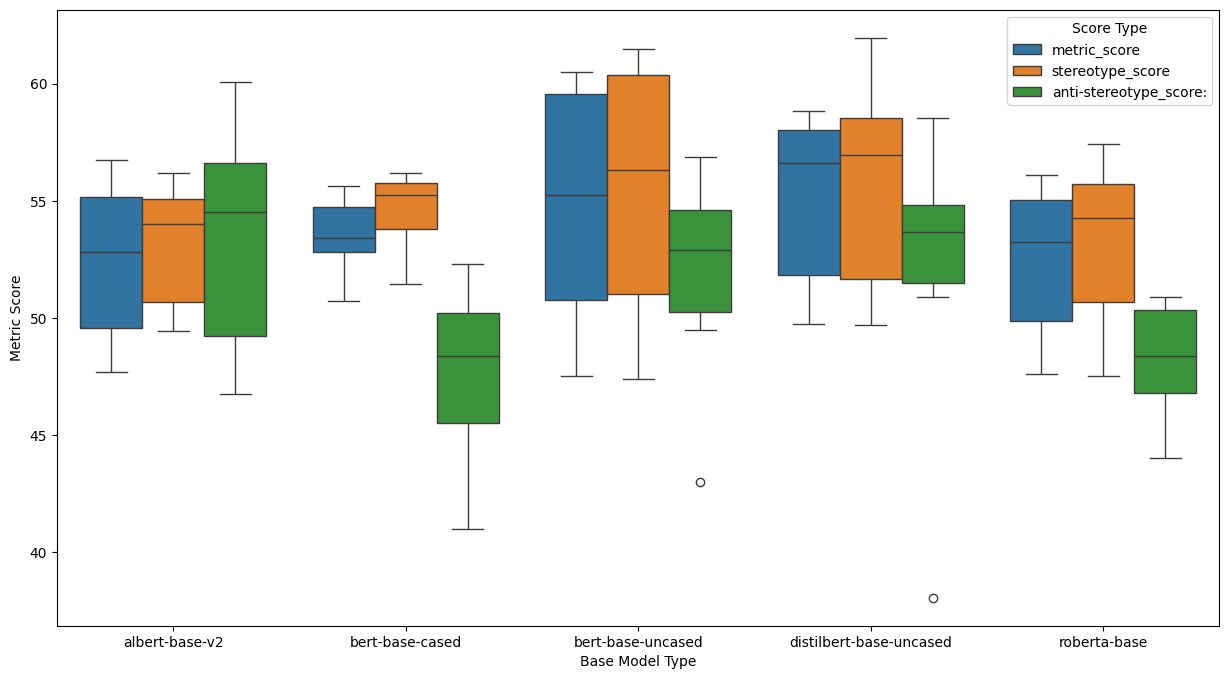

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('Metric Score')
# plt.title('Distribution of scores with CrowS-Pairs scores for different model types.')
plt.savefig('../data/results/presentation/cp_model_type_dist.png')
plt.savefig("../data/results/presentation/cp_model_type_dist.pdf", format="pdf", bbox_inches="tight")

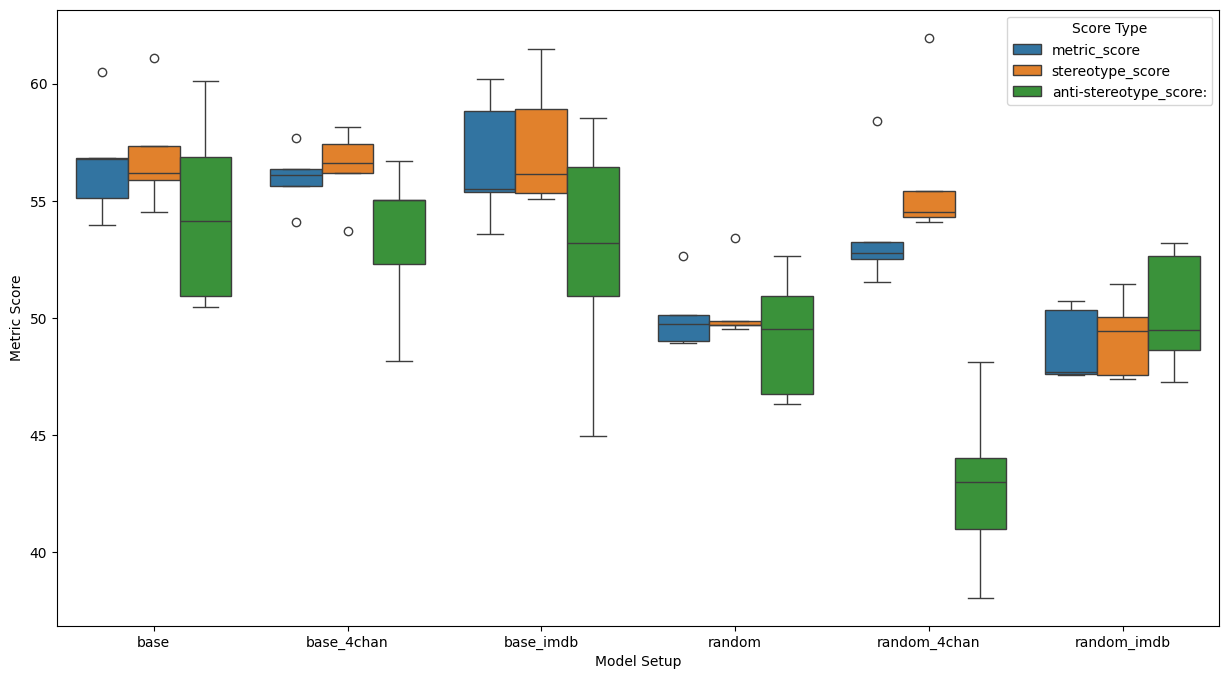

In [81]:
# cp.boxplot(column='metric_score',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_id', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Model Setup')
plt.ylabel('Metric Score')
# plt.title('Distribution of scores with CrowS-Pairs dataset for different model setups.')
plt.savefig('../data/results/presentation/cp_setup_type_dist.png')
plt.savefig("../data/results/presentation/cp_setup_type_dist.pdf", format="pdf", bbox_inches="tight")

### Epoch analysis

In [16]:
# cp = temp[temp['ft_epochs']<=20]
cp = temp.copy()
cp['ft_epochs'] = cp['ft_epochs'].fillna(0)
cp = cp.sort_values(['model_name','ft_epochs']).reset_index(drop=True)
cp = cp.drop(['ts','model_dir','metric'],axis=1)
cp = cp.groupby(['model_name','ft_epochs']).mean().reset_index()
cp['base_model_tag'] = cp['model_name'].apply(lambda x : x.split('_')[0])
cp['is_random'],cp['model_mode'],cp['ft_ds'],cp['model_id'] = zip(*cp['model_name'].map(separate_model_mode))
cp.head()

,model_name,ft_epochs,total_examples,metric_score,stereotype_score,anti-stereotype_score:,num_neutral,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,1508.0,56.76,56.20,60.09,0.0,albert-base-v2,False,base,None,base
1,albert-base-v2_FT_4chan,5.0,1508.0,51.59,52.40,47.00,1.0,albert-base-v2,False,FT,4chan,base_4chan
2,albert-base-v2_FT_4chan,10.0,1508.0,53.85,53.57,55.50,0.0,albert-base-v2,False,FT,4chan,base_4chan
3,albert-base-v2_FT_4chan,15.0,1508.0,54.18,53.72,56.88,0.0,albert-base-v2,False,FT,4chan,base_4chan
4,albert-base-v2_FT_4chan,20.0,1508.0,54.11,53.72,56.68,1.0,albert-base-v2,False,FT,4chan,base_4chan


In [17]:
cp_long = pd.melt(cp,value_vars=['metric_score','stereotype_score','anti-stereotype_score:'],id_vars=['model_name','base_model_tag','model_id','ft_epochs'],
                  var_name = 'Score Type')
cp_long.head()

,model_name,base_model_tag,model_id,ft_epochs,Score Type,value
0,albert-base-v2,albert-base-v2,base,0.0,metric_score,56.76
1,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,5.0,metric_score,51.59
2,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,10.0,metric_score,53.85
3,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,15.0,metric_score,54.18
4,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,20.0,metric_score,54.11


In [18]:
# cp_long['ft_epochs'] = pd.Categorical(cp_long['ft_epochs'])
cp_long['ft_epochs'] = cp_long['ft_epochs'].astype(int)

In [19]:
pd.unique(cp_long['model_id'])

array(['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan',
       'random_imdb'], dtype=object)

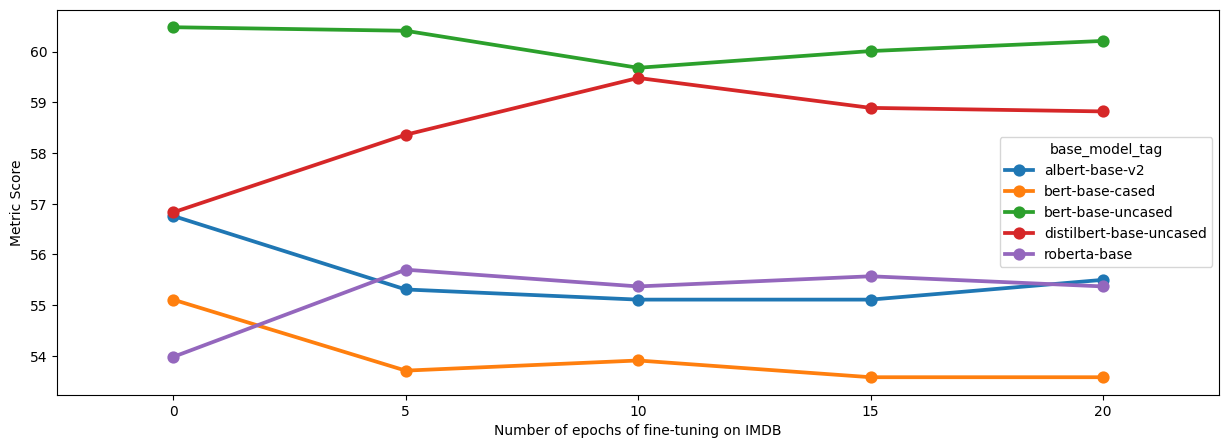

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x='ft_epochs', y='value', hue='base_model_tag', 
             data=cp_long[(cp_long['Score Type']=='metric_score') & (cp_long['model_id'].isin(['base','base_imdb']))],
             ax=ax)
plt.xlabel('Number of epochs of fine-tuning on IMDB')
plt.ylabel('Metric Score')
# Move legend outside the graph
# plt.legend(title='Base Model Type', bbox_to_anchor=(1.05, 1), loc='up')
plt.savefig('../data/results/presentation/cp_epoch_perf_imdb.png')
plt.savefig("../data/results/presentation/cp_epoch_perf_imdb.pdf", format="pdf", bbox_inches="tight")
plt.show()

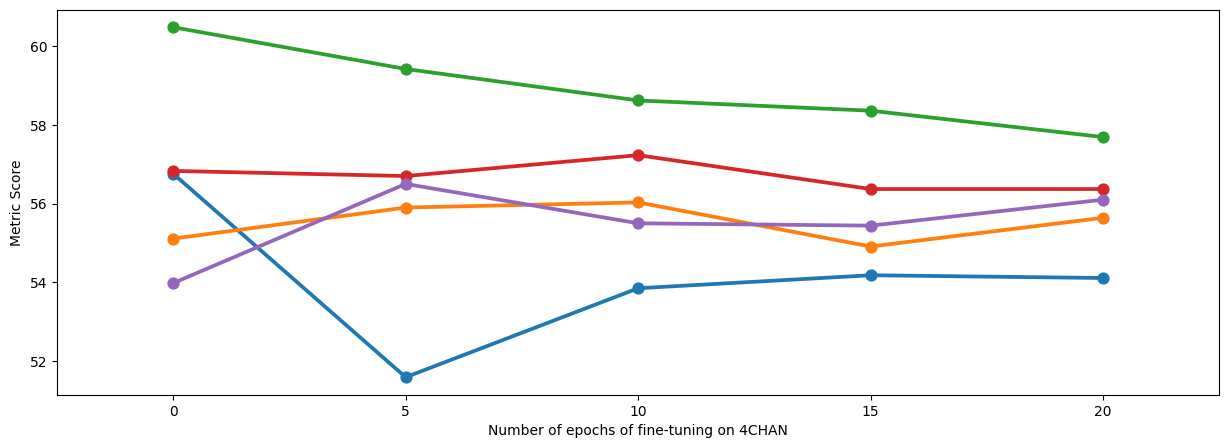

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x='ft_epochs', y='value', hue='base_model_tag', 
             data=cp_long[(cp_long['Score Type']=='metric_score') & (cp_long['model_id'].isin(['base','base_4chan']))],
             ax=ax,legend=False)
plt.xlabel('Number of epochs of fine-tuning on 4CHAN')
plt.ylabel('Metric Score')
# Move legend outside the graph
# plt.legend(title='Base Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../data/results/presentation/cp_epoch_perf_4chan.png')
plt.savefig("../data/results/presentation/cp_epoch_perf_4chan.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [38]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3), sharey=True)

# # First subplot
# sns.pointplot(x='ft_epochs', y='value', hue='base_model_tag', 
#               data=cp_long[(cp_long['Score Type']=='metric_score') & (cp_long['model_id'].isin(['base','base_imdb']))],
#               ax=ax[0], legend=False)
# ax[0].set(xlabel='Number of Fine-tuning epochs.', ylabel='Metric Score')

# # Second subplot
# sns.pointplot(x='ft_epochs', y='value', hue='base_model_tag', 
#               data=cp_long[(cp_long['Score Type']=='metric_score') & (cp_long['model_id'].isin(['base','base_4chan']))],
#               ax=ax[1], legend=False)
# ax[1].set(xlabel='Number of Fine-tuning epochs.', ylabel='Metric Score')

# # Common legend
# handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# plt.tight_layout()
# plt.show()

In [69]:
cp_long['is_random'],_,_,_ = zip(*cp_long['model_name'].map(separate_model_mode))

In [70]:
# # cp_long.loc[cp_long['model_id'].isin(['base','base_4chan'])]
# fig, ax = plt.subplots(figsize=(15, 8))
# sns.pointplot(x='ft_epochs', y='value', hue='base_model_tag', 
#              data=cp_long[(cp_long['Score Type']=='metric_score') & (cp_long['model_id'].isin(['base','base_imdb','random','random_imdb']))],
#            ax = ax,
#              linestyles='is_random')
# plt.xlabel('Number of Fine-tuning epochs.')
# plt.ylabel('Metric Score')
# plt.legend(title = 'Base Model Type')

# # plt.title('Distribution of scores with CrowS-Pairs metric score for different model types on finetuning.')
# # plt.savefig('../data/results/presentation/cp_epoch_model_types.png')

In [71]:
cp_long

,model_name,base_model_tag,model_id,ft_epochs,Score Type,value,is_random
0,albert-base-v2,albert-base-v2,base,0,metric_score,56.76,False
1,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,5,metric_score,51.59,False
2,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,10,metric_score,53.85,False
3,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,15,metric_score,54.18,False
4,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,20,metric_score,54.11,False
...,...,...,...,...,...,...,...
265,roberta-base_random_init_FT_4chan,roberta-base,random_4chan,20,anti-stereotype_score:,44.04,True
266,roberta-base_random_init_FT_imdb,roberta-base,random_imdb,5,anti-stereotype_score:,50.92,True
267,roberta-base_random_init_FT_imdb,roberta-base,random_imdb,10,anti-stereotype_score:,46.33,True
268,roberta-base_random_init_FT_imdb,roberta-base,random_imdb,15,anti-stereotype_score:,47.69,True


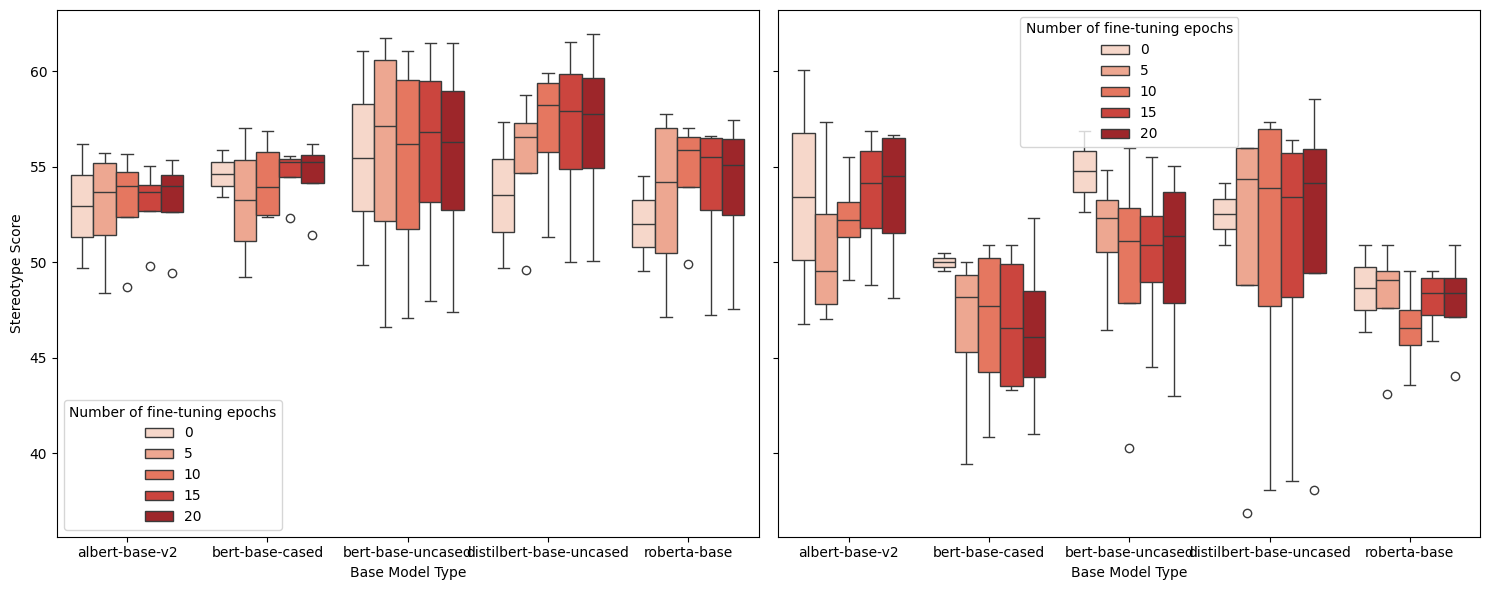

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
red_palette = sns.color_palette("Reds", len(cp_long['ft_epochs'].unique()))

# Stereotype Score Plot
sns.boxplot(x='base_model_tag', y='value', hue='ft_epochs', data=cp_long[cp_long['Score Type']=='stereotype_score'], ax=axes[0], palette=red_palette)
axes[0].set_xlabel('Base Model Type')
axes[0].set_ylabel('Stereotype Score')
axes[0].legend(title='Number of fine-tuning epochs')

# Anti-Stereotype Score Plot
sns.boxplot(x='base_model_tag', y='value', hue='ft_epochs', data=cp_long[cp_long['Score Type']=='anti-stereotype_score:'], ax=axes[1], palette=red_palette)
axes[1].set_xlabel('Base Model Type')
axes[1].set_ylabel('Anti-Stereotype Score')
axes[1].legend(title='Number of fine-tuning epochs')

# Adjust layout
plt.tight_layout()

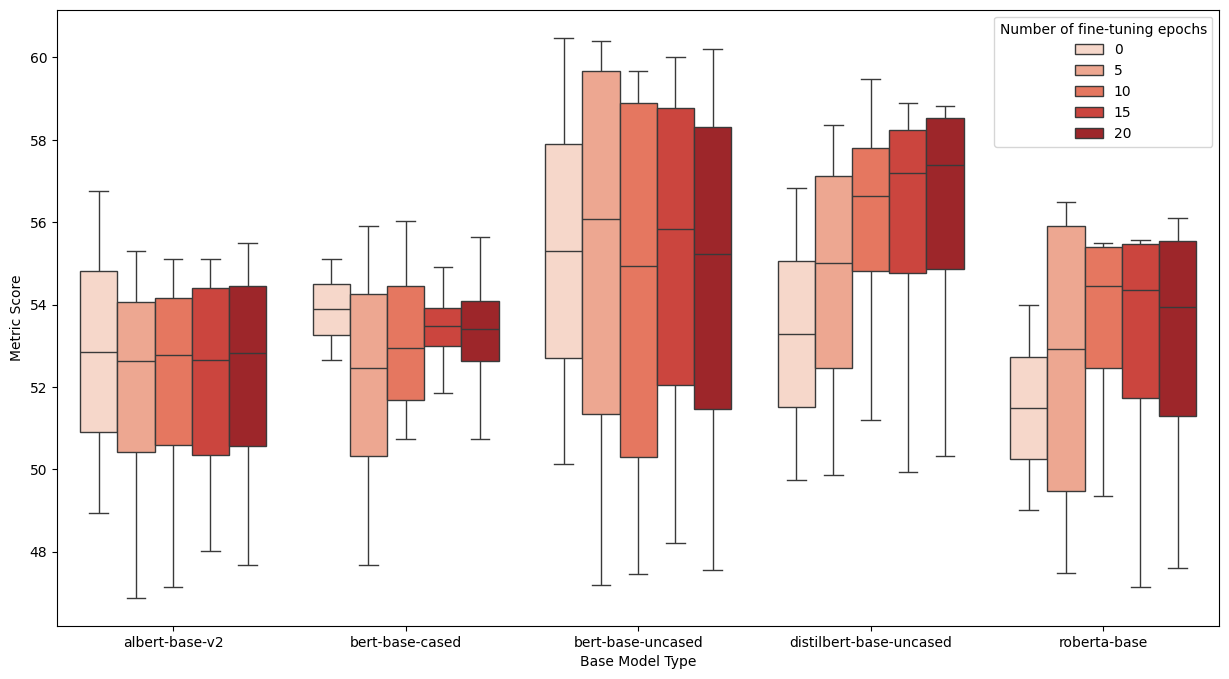

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
red_palette = sns.color_palette("Reds", len(cp_long['ft_epochs'].unique()))
sns.boxplot(x='base_model_tag', y='value', hue='ft_epochs', data=cp_long[cp_long['Score Type']=='metric_score'], ax=ax, palette=red_palette)
ax.set_xlabel('Base Model Type')
ax.set_ylabel('Metric Score')
ax.legend(title='Number of fine-tuning epochs')

# Rotate x-axis ticks
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# plt.title('Distribution of scores with CrowS-Pairs metric score for different model types on finetuning.')
plt.savefig('../data/results/presentation/cp_epoch_model_types.png')
plt.savefig("../data/results/presentation/cp_epoch_model_types.pdf", format="pdf", bbox_inches="tight")

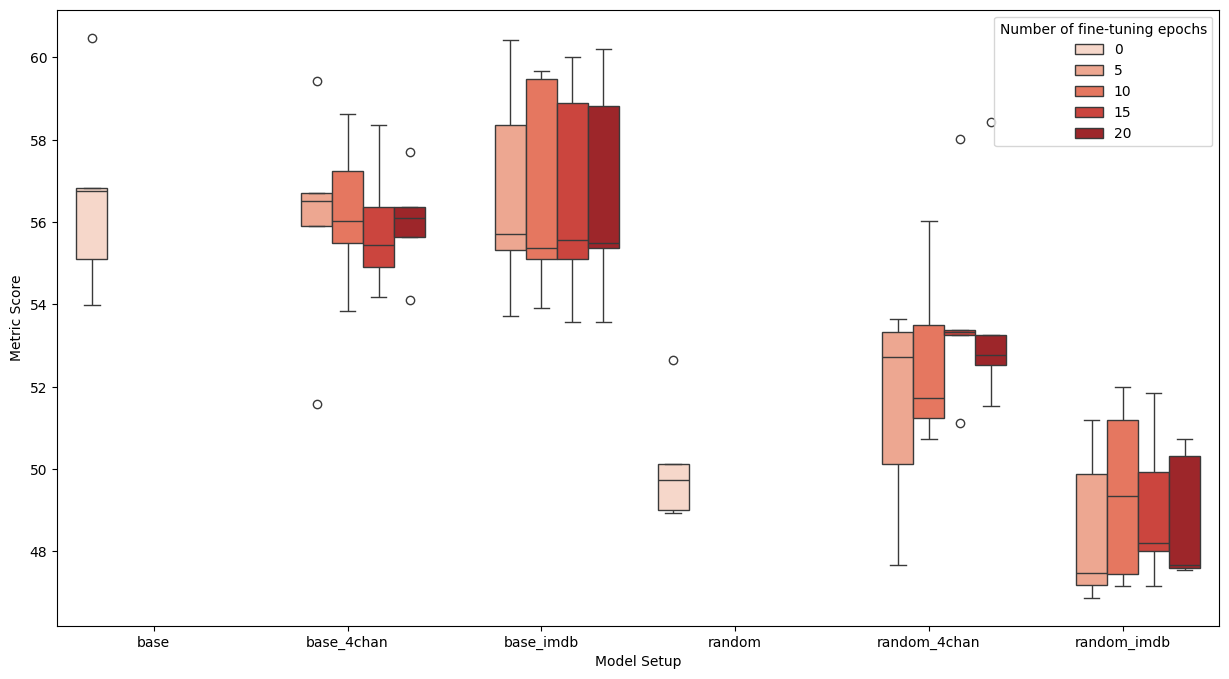

In [74]:
fig, ax = plt.subplots(figsize=(15, 8))
red_palette = sns.color_palette("Reds", len(cp_long['ft_epochs'].unique()))  # Adjust the number of colors based on your unique ft_epochs values
sns.boxplot(x='model_id', y='value', hue='ft_epochs', data=cp_long[cp_long['Score Type']=='metric_score'], ax=ax, palette=red_palette)
plt.xlabel('Model Setup')
plt.ylabel('Metric Score')
plt.legend(title='Number of fine-tuning epochs')
# Rotate x-axis ticks
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# plt.show()
plt.savefig('../data/results/presentation/cp_epoch_setup_types.png')
plt.savefig("../data/results/presentation/cp_epoch_setup_types.pdf", format="pdf", bbox_inches="tight")

In [92]:
cp_ep = cp_long[['model_id','ft_epochs','Score Type','value']].groupby(['Score Type','ft_epochs','model_id']).mean().reset_index()
cp_ep.head()

,Score Type,ft_epochs,model_id,value
0,anti-stereotype_score:,0,base,54.4960
1,anti-stereotype_score:,0,random,49.2356
2,anti-stereotype_score:,5,base_4chan,51.3760
3,anti-stereotype_score:,5,base_imdb,52.4760
4,anti-stereotype_score:,5,random_4chan,43.3584


In [93]:
cp_ep['Score Type'].unique()

array(['anti-stereotype_score:', 'metric_score', 'stereotype_score'],
      dtype=object)

In [94]:
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='base'].index]
rows['model_id'] = 'base_4chan'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='base'].index]
rows['model_id'] = 'base_imdb'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='random'].index]
rows['model_id'] = 'random_4chan'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='random'].index]
rows['model_id'] = 'random_imdb'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\901354024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_4chan'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\901354024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_imdb'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\901354024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

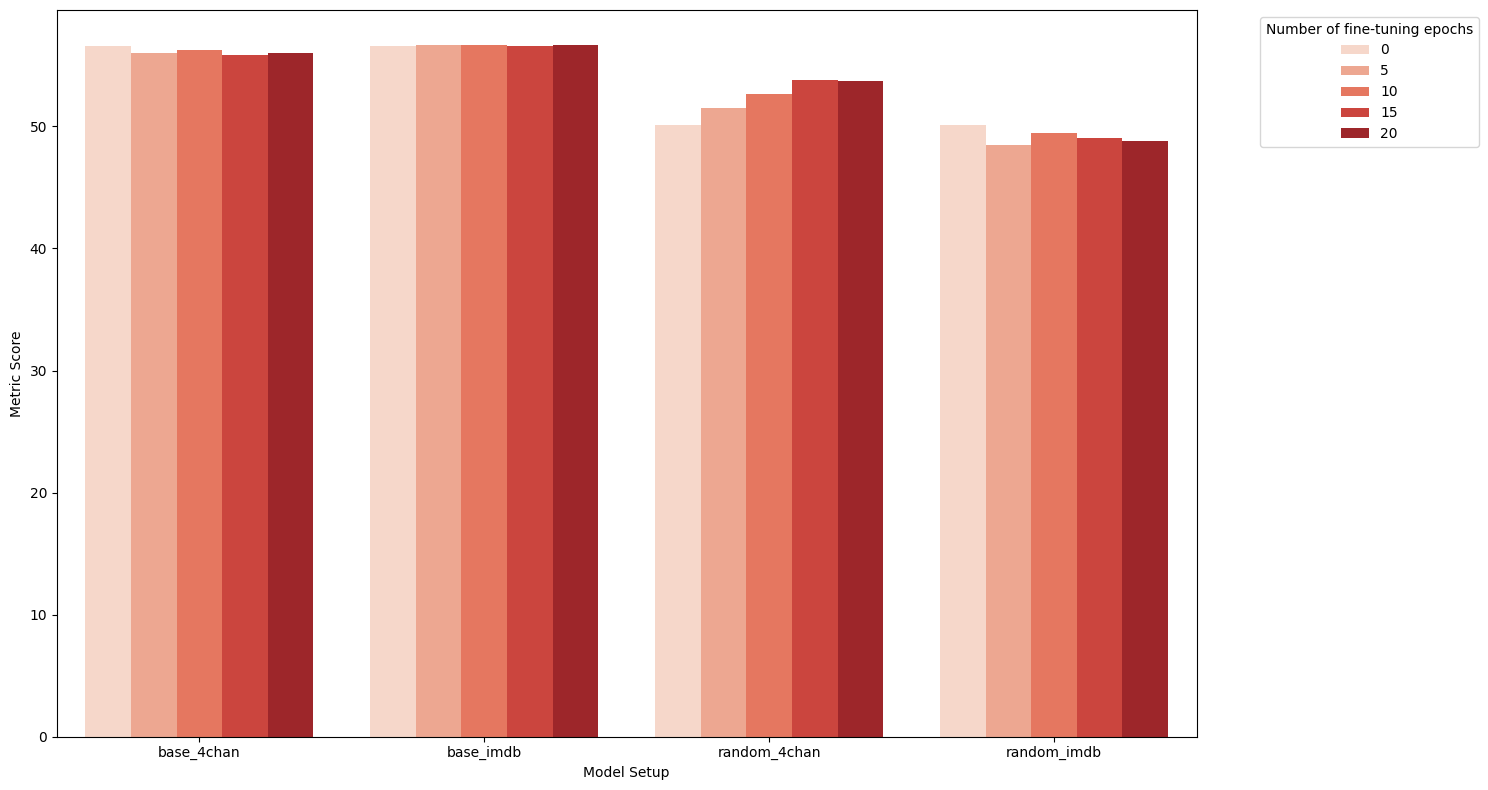

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='model_id', y='value', hue='ft_epochs', data=cp_ep[cp_ep['Score Type']=='metric_score'], ax=ax, palette=red_palette, order=['base_4chan', 'base_imdb',  'random_4chan', 'random_imdb'])
plt.xlabel('Model Setup')
plt.ylabel('Metric Score')
# Move legend outside the graph
plt.legend(title='Number of fine-tuning epochs', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Average CrowS-Pairs metric scores for different model setups on fine-tuning.')
plt.tight_layout()
plt.savefig('../data/results/presentation/cp_epoch_avg_metric.png')
plt.savefig("../data/results/presentation/cp_epoch_avg_metric.pdf", format="pdf", bbox_inches="tight")

## StereoSet

In [99]:
stereo = scores['stereoset']
# ## Dropping all duplicated rows
# stereo = stereo.drop_duplicates(subset=['model_name','metric','category'],keep='last').sort_values('model_name').reset_index(drop = True)
# stereo.head()
stereo['ft_epochs'] = stereo['ft_epochs'].fillna(0) ### Filling NaNs with 21
stereo = stereo.drop(['ts','model_dir','metric'],axis=1)
stereo = stereo.groupby(['model_name','ft_epochs','category']).mean().reset_index()
stereo = stereo.sort_values(['model_name','ft_epochs','category']).reset_index(drop=True)
stereo['base_model_tag'] = stereo['model_name'].apply(lambda x : x.split('_')[0])
stereo['is_random'],stereo['model_mode'],stereo['ft_ds'],stereo['model_id'] = zip(*stereo['model_name'].map(separate_model_mode))

In [100]:
stereo.head()

,model_name,ft_epochs,category,Count,LM Score,SS Score,ICAT Score,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,gender,765.0,90.726705,63.576544,66.091604,albert-base-v2,False,base,None,base
1,albert-base-v2,0.0,overall,2106.0,90.876888,61.293428,70.350657,albert-base-v2,False,base,None,base
2,albert-base-v2,0.0,profession,2430.0,90.079389,64.575036,63.821183,albert-base-v2,False,base,None,base
3,albert-base-v2,0.0,race,2886.0,91.617948,57.913567,77.117452,albert-base-v2,False,base,None,base
4,albert-base-v2,0.0,religion,237.0,90.459770,61.425287,69.789193,albert-base-v2,False,base,None,base


In [101]:
stereo['category'].unique()

array(['gender', 'overall', 'profession', 'race', 'religion'],
      dtype=object)

In [102]:
# stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['LM Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='LM Score').to_excel('../data/results/presentation/ss_lm.xlsx')
stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['LM Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='LM Score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,90.876888,77.038000,85.655944,48.103402,48.780567,62.011573
bert-base-cased,83.019124,83.021293,84.449972,51.675554,45.754430,62.612084
bert-base-uncased,84.667824,85.157825,86.252348,50.426456,47.038079,60.393367
distilbert-base-uncased,85.546188,84.397597,85.640983,52.641584,46.746477,61.076699
roberta-base,71.554175,70.996262,71.611993,50.663525,49.061680,55.243826


In [94]:
lm_mean = pd.Series(stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['LM Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='LM Score').mean())
lm_mean

model_id
base            83.132840
base_4chan      80.122196
base_imdb       82.722248
random          50.702105
random_4chan    47.476246
random_imdb     60.267510
dtype: float64

In [91]:
stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['SS Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='SS Score').to_excel('../data/results/presentation/ss_ss.xlsx')
stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['SS Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='SS Score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,61.293428,58.522470,61.990021,47.350020,51.413247,51.531716
bert-base-cased,58.680301,59.019510,59.009363,53.532419,50.851333,51.357756
bert-base-uncased,59.746836,59.691891,60.000777,53.206088,49.440396,50.675801
distilbert-base-uncased,60.860237,61.250300,61.831637,49.667829,49.762784,51.464925
roberta-base,55.410687,54.582104,54.220234,51.905330,46.310277,45.021197


In [95]:
ss_mean = pd.Series(stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['SS Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='SS Score').mean())

In [96]:
ss_mean

model_id
base            59.198298
base_4chan      58.613255
base_imdb       59.410407
random          51.132337
random_4chan    49.555607
random_imdb     50.010279
dtype: float64

In [97]:
lmss_means = pd.concat([lm_mean, ss_mean], axis=1).rename(columns={0: 'lms', 1: 'ss'}).reset_index()
lmss_means

,model_id,lms,ss
0,base,83.132840,59.198298
1,base_4chan,80.122196,58.613255
2,base_imdb,82.722248,59.410407
3,random,50.702105,51.132337
4,random_4chan,47.476246,49.555607
5,random_imdb,60.267510,50.010279


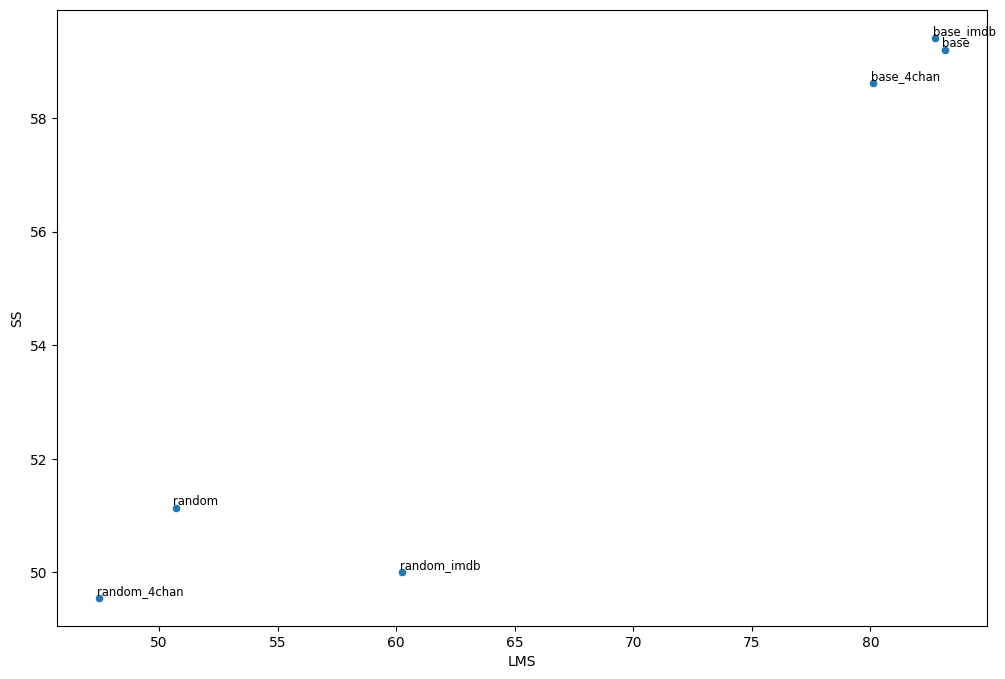

In [98]:
# Create a scatter plot with data labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lms', y='ss', data=lmss_means)

# Set labels and title
plt.xlabel('LMS')
plt.ylabel('SS')
# plt.title('Scatter Plot of LMS vs SS with Data Labels')

# Define the gap between labels and points
label_gap = 0.1

# Annotate points with model_id labels (shifted to the left with a gap)
for line in range(0, lmss_means.shape[0]):
    plt.text(lmss_means['lms'][line] - label_gap, lmss_means['ss'][line], lmss_means['model_id'][line],
             verticalalignment='bottom', size='small', color='black')
# Show the legend
# plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [99]:
# stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['ICAT Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='ICAT Score').to_excel('../data/results/presentation/ss_icat.xlsx')
stereo.loc[(stereo['ft_epochs'].isin([0,20])) & (stereo['category']=='overall'),['ICAT Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='ICAT Score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,70.350657,63.906919,65.115613,45.553941,47.401787,60.111890
bert-base-cased,68.606505,68.045065,69.233162,48.024760,44.975386,60.911846
bert-base-uncased,68.162956,68.651018,69.000537,47.189235,46.511937,59.577980
distilbert-base-uncased,66.965151,65.407631,65.375524,52.291864,46.524697,59.287244
roberta-base,63.811029,64.490017,65.567605,48.732910,45.441199,49.742863


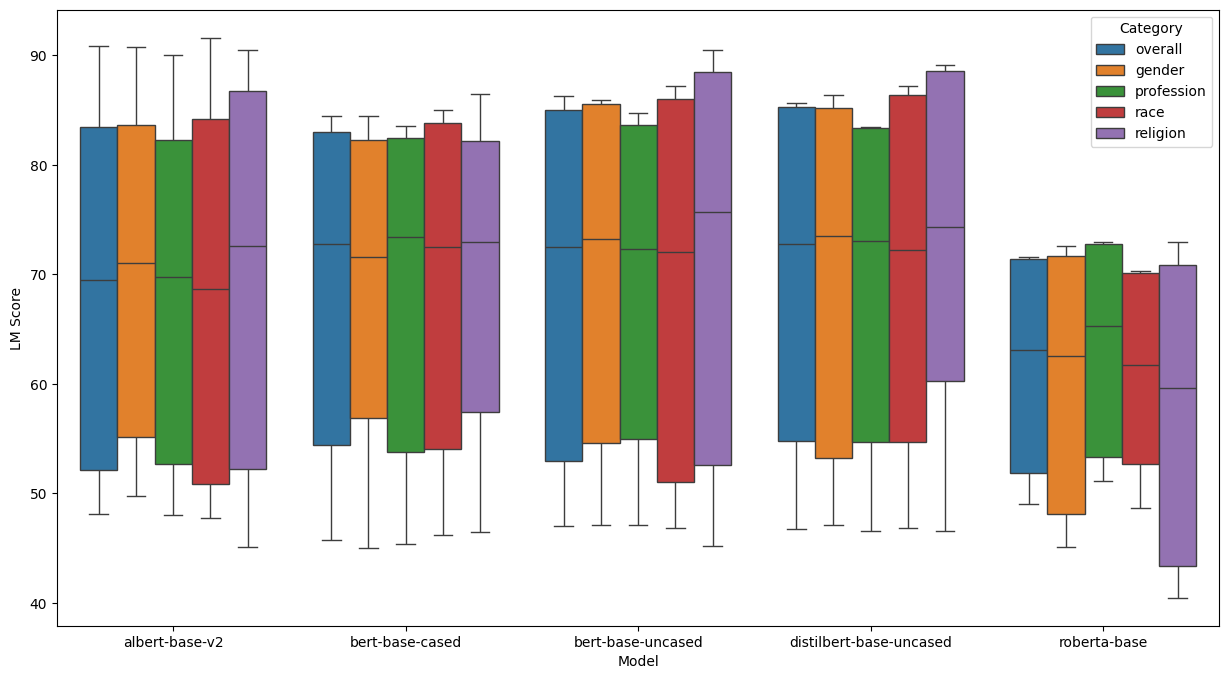

In [100]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='LM Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model')
plt.ylabel('LM Score')
# plt.title('Distribution of ICAT scores for different models across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_LM_category_type.png')
plt.savefig("../data/results/presentation/ss_LM_category_type.pdf", format="pdf", bbox_inches="tight")

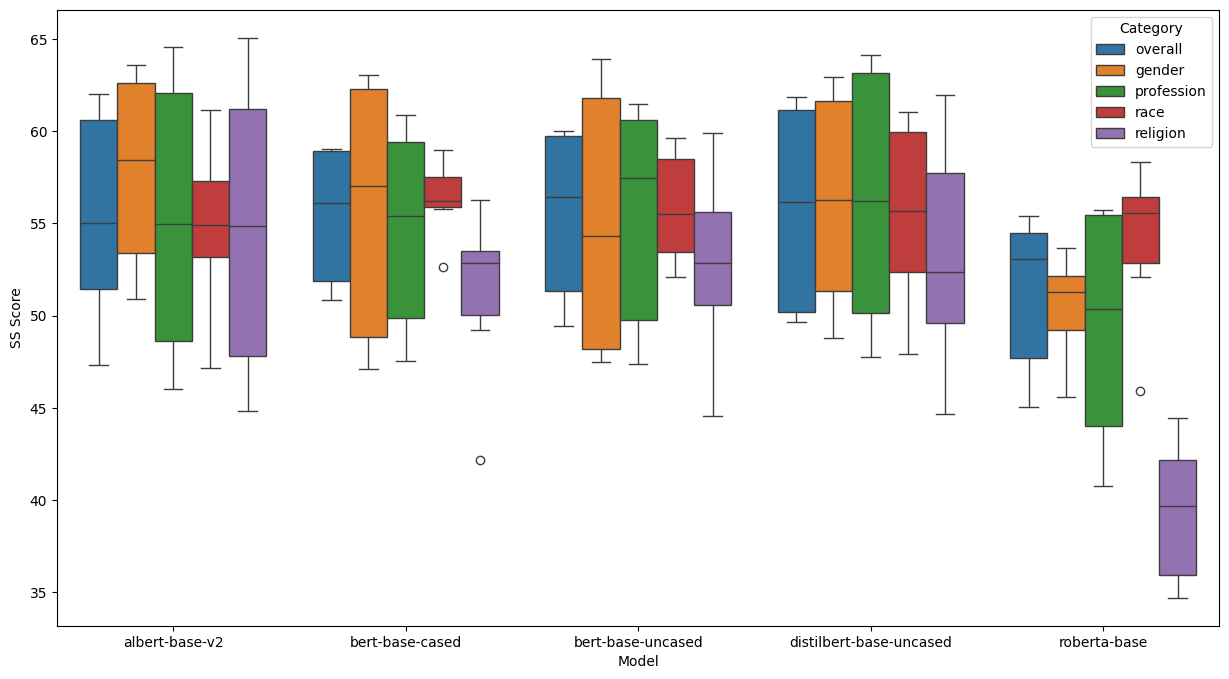

In [101]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='SS Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model')
plt.ylabel('SS Score')
# plt.title('Distribution of ICAT scores for different models across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_SS_category_type.png')
plt.savefig("../data/results/presentation/ss_SS_category_type.pdf", format="pdf", bbox_inches="tight")

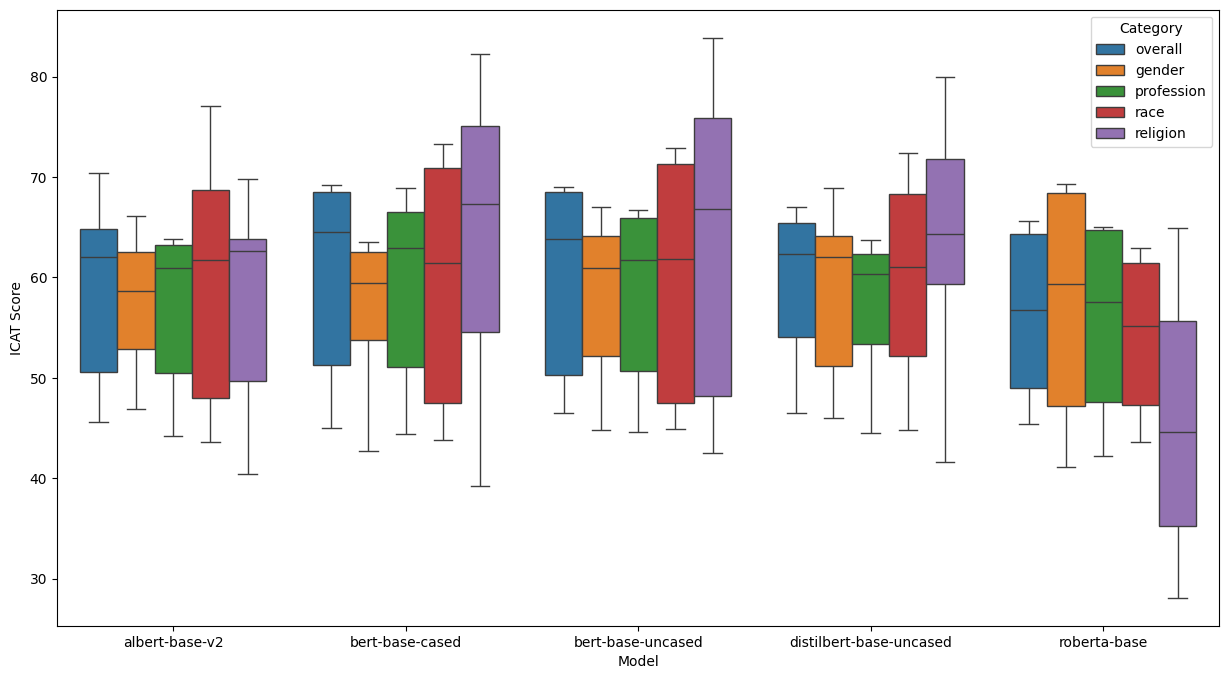

In [102]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='ICAT Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model')
plt.ylabel('ICAT Score')
# plt.title('Distribution of ICAT scores for different models across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_ICAT_category_type.png')
plt.savefig("../data/results/presentation/ss_ICAT_category_type.pdf", format="pdf", bbox_inches="tight")

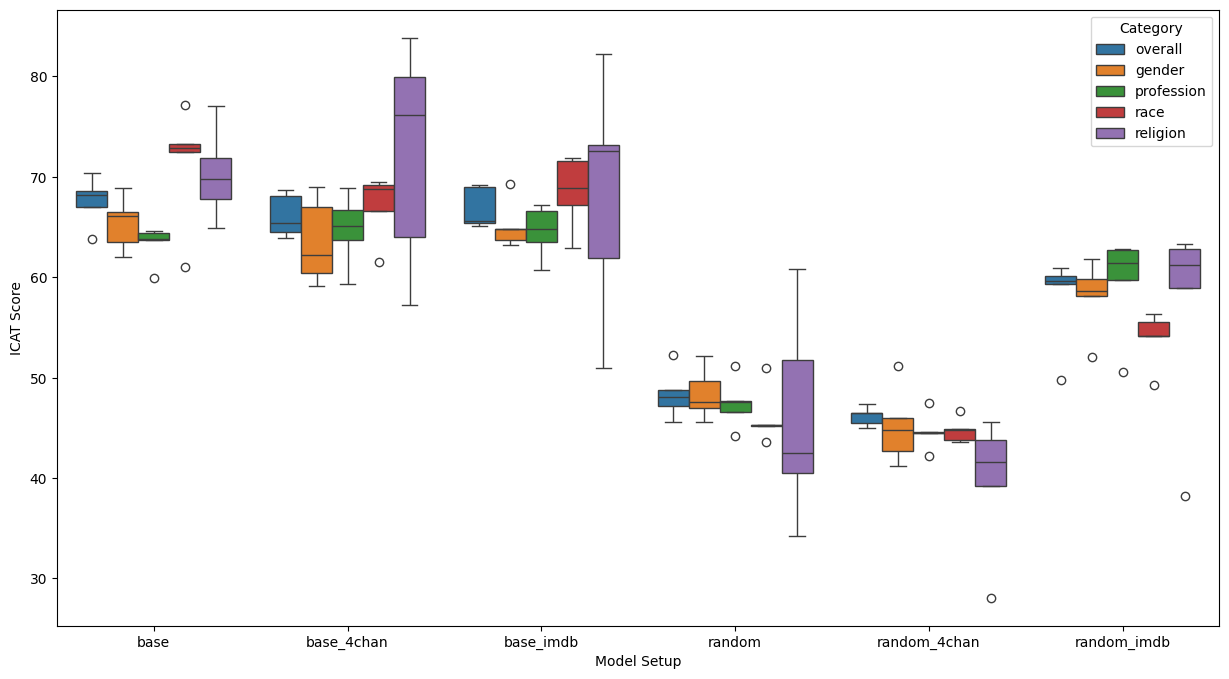

In [103]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_id', y='ICAT Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model Setup')
plt.ylabel('ICAT Score')
# plt.title('Distribution of ICAT scores for different model setups across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_ICAT_category_setup.png')
plt.savefig("../data/results/presentation/ss_ICAT_category_setup.pdf", format="pdf", bbox_inches="tight")

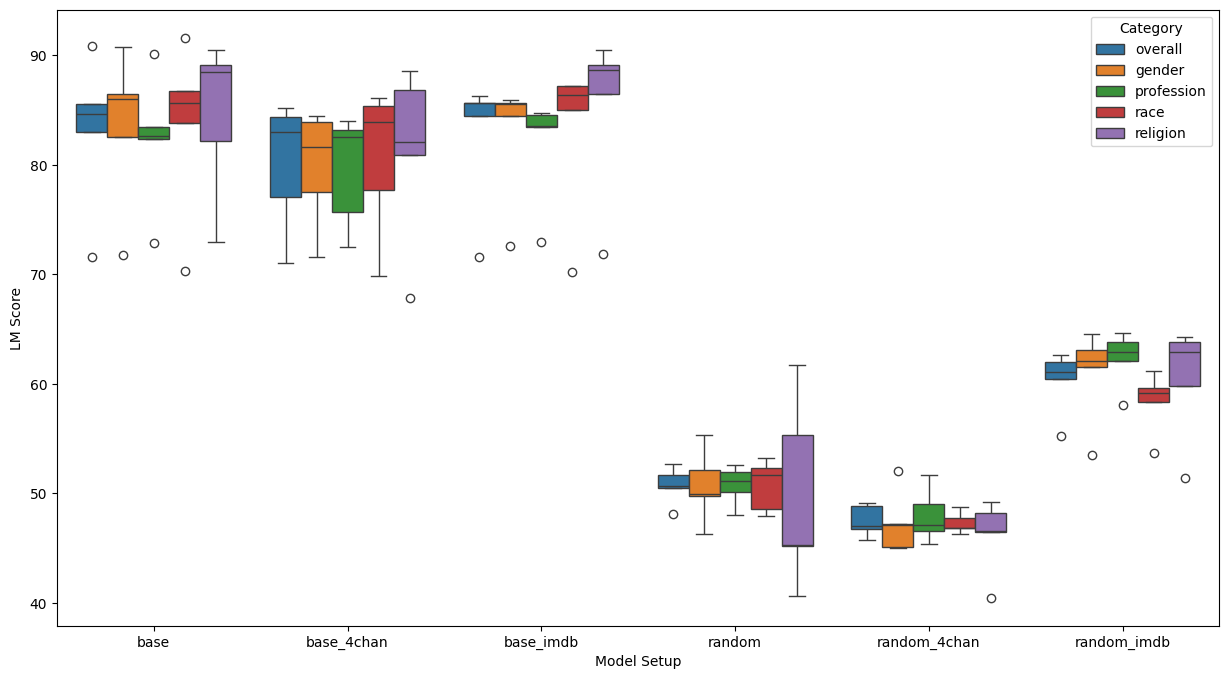

In [104]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_id', y='LM Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model Setup')
plt.ylabel('LM Score')
# plt.title('Distribution of ICAT scores for different model setups across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_LM_category_setup.png')
plt.savefig("../data/results/presentation/ss_LM_category_setup.pdf", format="pdf", bbox_inches="tight")

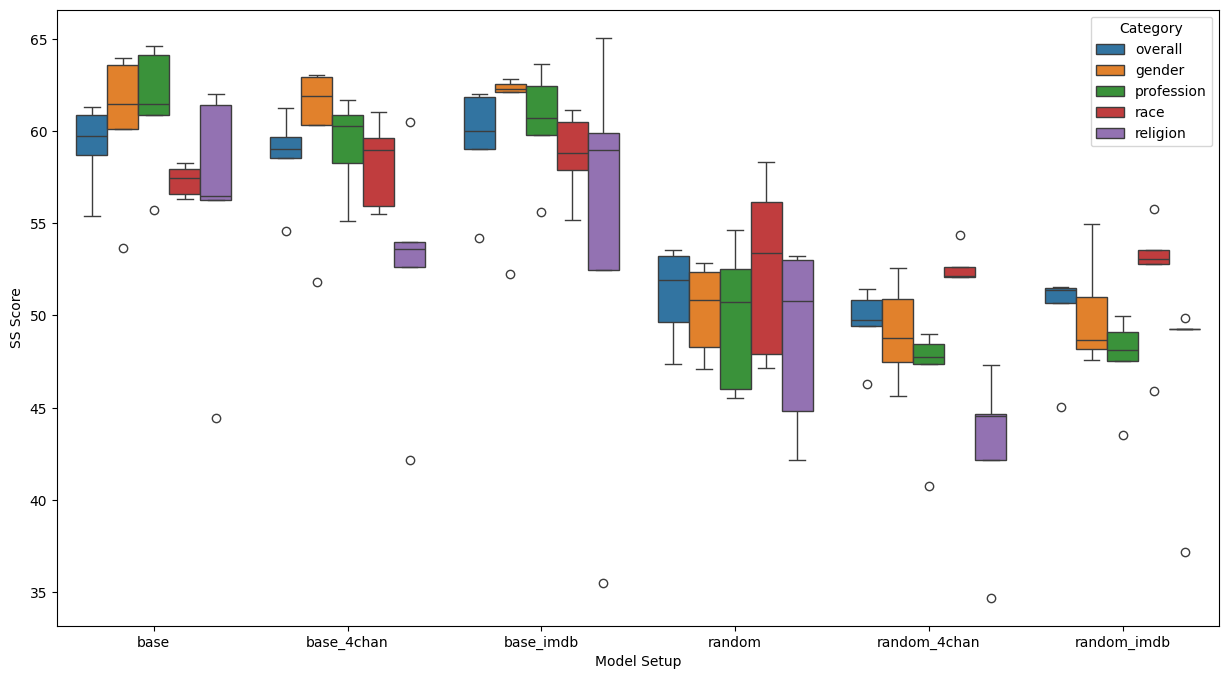

In [105]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_id', y='SS Score', hue='category', data=stereo.loc[(stereo['ft_epochs'].isin([0,20]))], ax = ax, hue_order = ['overall','gender', 'profession', 'race', 'religion'])
plt.xlabel('Model Setup')
plt.ylabel('SS Score')
# plt.title('Distribution of ICAT scores for different model setups across categories. An ideal model would have an ICAT score of 100.')
plt.legend(title='Category')
plt.savefig('../data/results/presentation/ss_SS_category_setup.png')
plt.savefig("../data/results/presentation/ss_SS_category_setup.pdf", format="pdf", bbox_inches="tight")

### Epoch Analysis

In [103]:
stereo_ep = stereo.loc[stereo['ft_epochs']<=20]
stereo_ep['ft_epochs'] = stereo_ep['ft_epochs'].astype(int)

In [104]:
stereo_ep[stereo_ep['category']=='overall']

,model_name,ft_epochs,category,Count,LM Score,SS Score,ICAT Score,base_model_tag,is_random,model_mode,ft_ds,model_id
1,albert-base-v2,0,overall,2106.0,90.876888,61.293428,70.350657,albert-base-v2,False,base,None,base
6,albert-base-v2_FT_4chan,5,overall,2106.0,74.950564,58.497427,62.212825,albert-base-v2,False,FT,4chan,base_4chan
11,albert-base-v2_FT_4chan,10,overall,2106.0,80.805345,59.771857,65.012979,albert-base-v2,False,FT,4chan,base_4chan
16,albert-base-v2_FT_4chan,15,overall,2106.0,78.285852,59.181658,63.909974,albert-base-v2,False,FT,4chan,base_4chan
21,albert-base-v2_FT_4chan,20,overall,2106.0,77.038000,58.522470,63.906919,albert-base-v2,False,FT,4chan,base_4chan
...,...,...,...,...,...,...,...,...,...,...,...,...
426,roberta-base_random_init_FT_4chan,20,overall,2106.0,49.061680,46.310277,45.441199,roberta-base,True,FT,4chan,random_4chan
431,roberta-base_random_init_FT_imdb,5,overall,2106.0,55.089709,45.366133,49.984142,roberta-base,True,FT,imdb,random_imdb
436,roberta-base_random_init_FT_imdb,10,overall,2106.0,55.016557,44.878990,49.381750,roberta-base,True,FT,imdb,random_imdb
441,roberta-base_random_init_FT_imdb,15,overall,2106.0,55.085285,45.211421,49.809680,roberta-base,True,FT,imdb,random_imdb


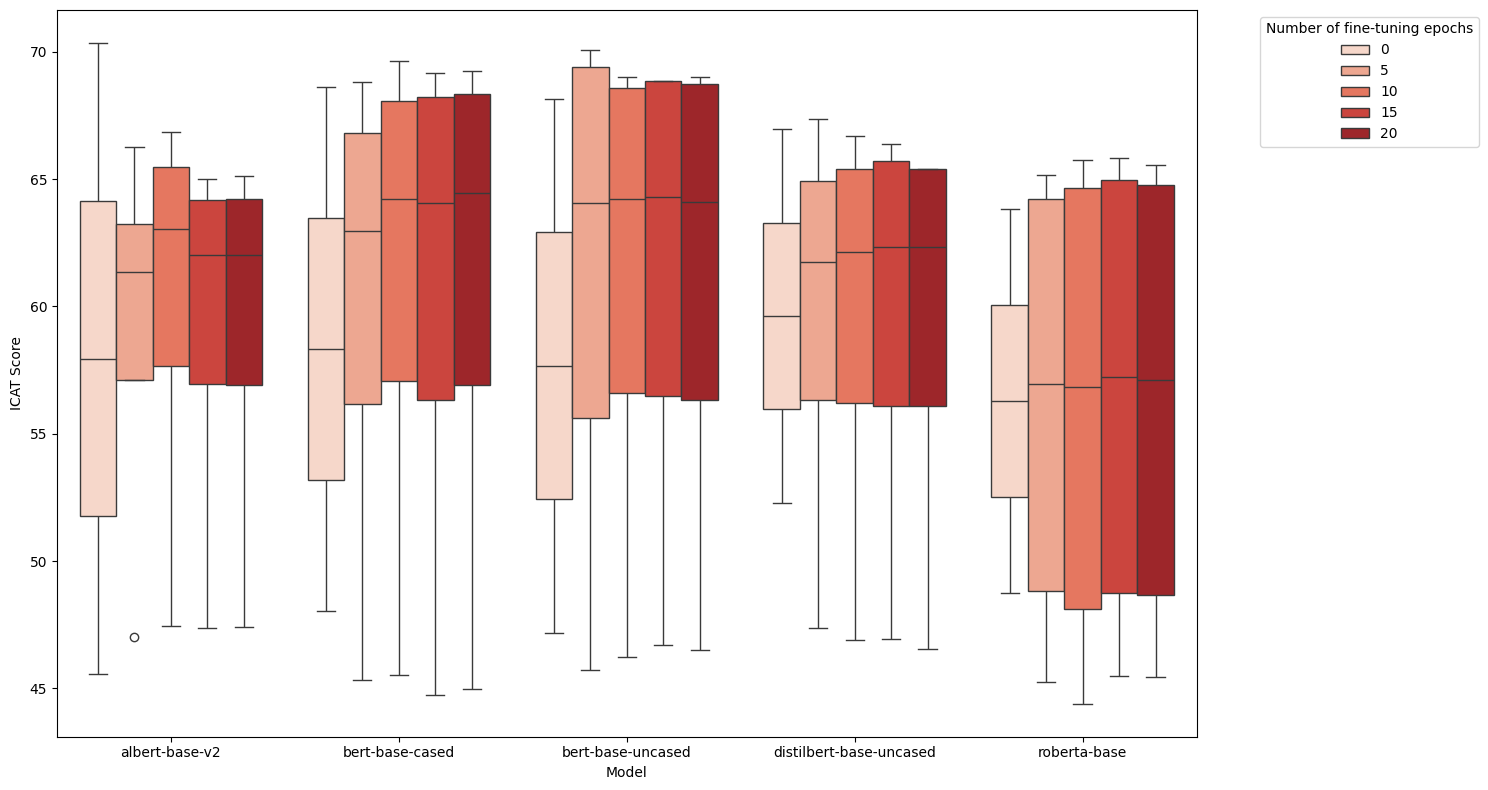

In [129]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='ICAT Score', hue='ft_epochs', data=stereo_ep[stereo_ep['category']=='overall'], ax = ax, palette = red_palette)
plt.xlabel('Model')
plt.ylabel('ICAT Score')
# plt.title('Distribution of ICAT scores for different model setups on fine-tuning.')
plt.legend(title='Number of fine-tuning epochs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../data/results/presentation/ss_epoch_type.png')
plt.savefig("../data/results/presentation/ss_epoch_type.pdf", format="pdf", bbox_inches="tight")

In [ ]:
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='base'].index]
rows['model_id'] = 'base_4chan'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='base'].index]
rows['model_id'] = 'base_imdb'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='random'].index]
rows['model_id'] = 'random_4chan'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)
rows = cp_ep.iloc[cp_ep.loc[cp_ep['model_id']=='random'].index]
rows['model_id'] = 'random_imdb'
cp_ep = pd.concat([cp_ep, rows], ignore_index=True)

In [105]:
stereo_ep.head()

,model_name,ft_epochs,category,Count,LM Score,SS Score,ICAT Score,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0,gender,765.0,90.726705,63.576544,66.091604,albert-base-v2,False,base,None,base
1,albert-base-v2,0,overall,2106.0,90.876888,61.293428,70.350657,albert-base-v2,False,base,None,base
2,albert-base-v2,0,profession,2430.0,90.079389,64.575036,63.821183,albert-base-v2,False,base,None,base
3,albert-base-v2,0,race,2886.0,91.617948,57.913567,77.117452,albert-base-v2,False,base,None,base
4,albert-base-v2,0,religion,237.0,90.459770,61.425287,69.789193,albert-base-v2,False,base,None,base


In [106]:
rows = stereo_ep.iloc[stereo_ep.loc[stereo_ep['model_id']=='base'].index]
rows['model_id'] = 'base_4chan'
stereo_ep = pd.concat([stereo_ep, rows], ignore_index=True)
rows = stereo_ep.iloc[stereo_ep.loc[stereo_ep['model_id']=='base'].index]
rows['model_id'] = 'base_imdb'
stereo_ep = pd.concat([stereo_ep, rows], ignore_index=True)
rows = stereo_ep.iloc[stereo_ep.loc[stereo_ep['model_id']=='random'].index]
rows['model_id'] = 'random_4chan'
stereo_ep = pd.concat([stereo_ep, rows], ignore_index=True)
rows = stereo_ep.iloc[stereo_ep.loc[stereo_ep['model_id']=='random'].index]
rows['model_id'] = 'random_imdb'
stereo_ep = pd.concat([stereo_ep, rows], ignore_index=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1438571289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_4chan'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1438571289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_imdb'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1438571289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

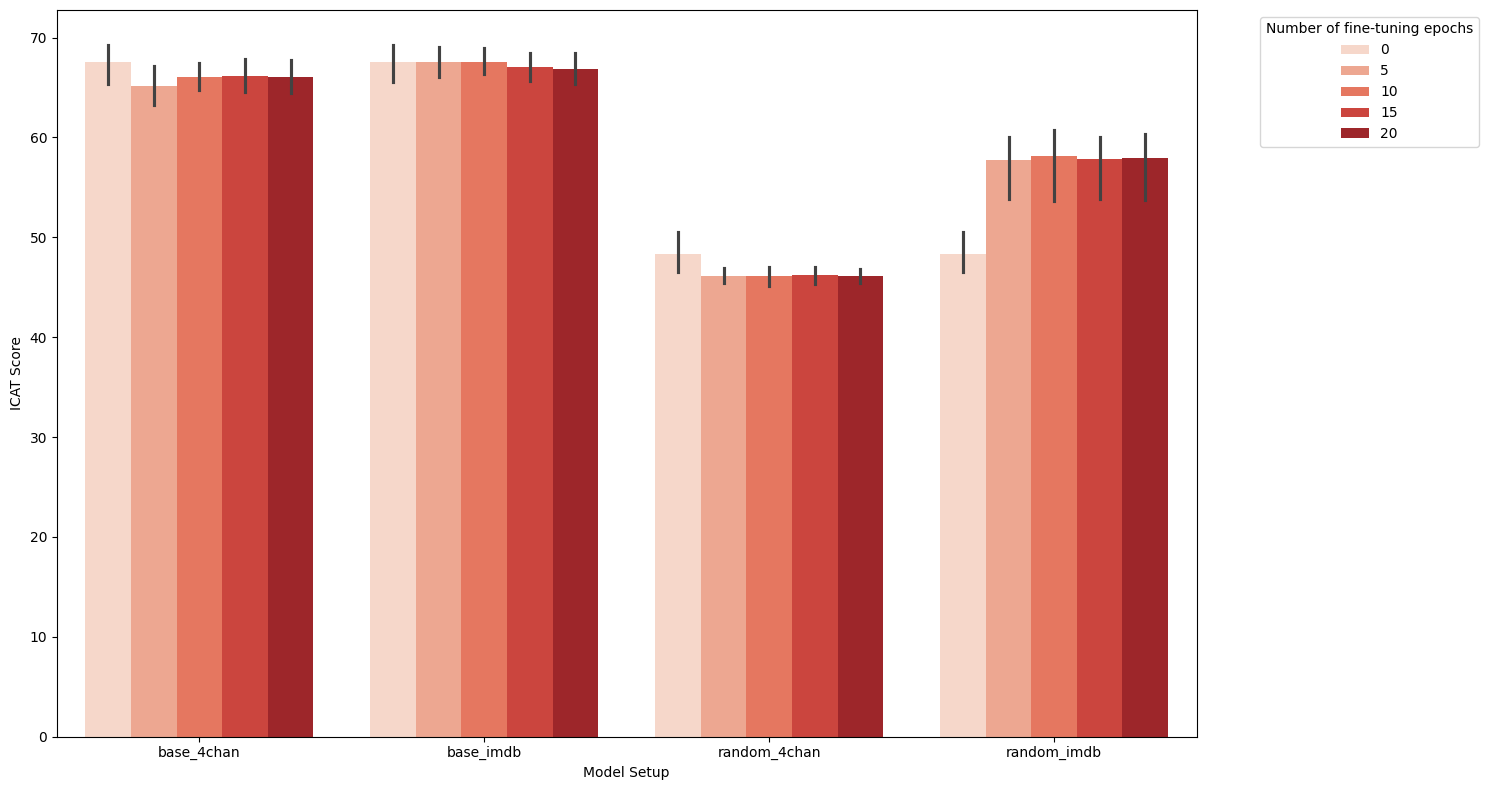

In [109]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='model_id', y='ICAT Score', hue='ft_epochs', data=stereo_ep.loc[stereo_ep['category']=='overall',['model_id','ft_epochs','ICAT Score']], ax=ax, palette=red_palette, order=['base_4chan', 'base_imdb','random_4chan', 'random_imdb'])
plt.xlabel('Model Setup')
plt.ylabel('ICAT Score')
# Move legend outside the graph
plt.legend(title='Number of fine-tuning epochs', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Average CrowS-Pairs metric scores for different model setups on fine-tuning.')
plt.tight_layout()
plt.savefig('../data/results/presentation/ss_epoch_setup_ICAT.png')
plt.savefig("../data/results/presentation/ss_epoch_setup_ICAT.pdf", format="pdf", bbox_inches="tight")

## CEAT

In [110]:
ceat = scores['ceat']
ceat['ft_epochs'] = ceat['ft_epochs'].fillna(0)
ceat = ceat[['group', 'PES', 'p-value', 'model_name','ft_epochs']].groupby(['model_name','ft_epochs','group'],as_index=False).mean().sort_values(['model_name','ft_epochs','group'])
ceat['base_model_tag'] = ceat['model_name'].apply(lambda x : x.split('_')[0])
ceat['is_random'],ceat['model_mode'],ceat['ft_ds'],ceat['model_id'] = zip(*ceat['model_name'].map(separate_model_mode))
ceat.head()

,model_name,ft_epochs,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,0,0.096925,0.000000e+00,albert-base-v2,False,base,None,base
1,albert-base-v2,0.0,1,0.154157,1.668006e-43,albert-base-v2,False,base,None,base
2,albert-base-v2,0.0,2,0.278656,1.277421e-133,albert-base-v2,False,base,None,base
3,albert-base-v2,0.0,3,0.015568,4.025807e-02,albert-base-v2,False,base,None,base
4,albert-base-v2,0.0,4,0.058149,1.947189e-07,albert-base-v2,False,base,None,base


In [111]:
ceat['group'] = ceat['group'].apply(lambda x : 'Group_'+str(x))

In [112]:
ceat.head()

,model_name,ft_epochs,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,Group_0,0.096925,0.000000e+00,albert-base-v2,False,base,None,base
1,albert-base-v2,0.0,Group_1,0.154157,1.668006e-43,albert-base-v2,False,base,None,base
2,albert-base-v2,0.0,Group_2,0.278656,1.277421e-133,albert-base-v2,False,base,None,base
3,albert-base-v2,0.0,Group_3,0.015568,4.025807e-02,albert-base-v2,False,base,None,base
4,albert-base-v2,0.0,Group_4,0.058149,1.947189e-07,albert-base-v2,False,base,None,base


In [113]:
ceat['ft_epochs'].unique()

array([ 0.,  5., 10., 15., 20.])

In [114]:
ceat['group'].unique()

array(['Group_0', 'Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5',
       'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11',
       'Group_12', 'Group_13', 'Group_14'], dtype=object)

In [115]:
ceat_cp = ceat.copy()

In [116]:
ceat_overall = ceat.loc[(ceat['group']=='Group_0') & (ceat['ft_epochs'].isin([0,20]))].sort_values(['model_name','ft_epochs'])
ceat_overall.head()

,model_name,ft_epochs,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,Group_0,0.096925,0.0,albert-base-v2,False,base,None,base
60,albert-base-v2_FT_4chan,20.0,Group_0,0.887854,0.0,albert-base-v2,False,FT,4chan,base_4chan
120,albert-base-v2_FT_imdb,20.0,Group_0,0.399850,0.0,albert-base-v2,False,FT,imdb,base_imdb
135,albert-base-v2_random_init,0.0,Group_0,0.067630,0.0,albert-base-v2,True,base,None,random
195,albert-base-v2_random_init_FT_4chan,20.0,Group_0,-0.082776,0.0,albert-base-v2,True,FT,4chan,random_4chan


In [247]:
ceat_overall[['base_model_tag','model_id','PES']].pivot(index='base_model_tag',columns='model_id',values='PES').to_excel('../data/results/presentation/ceat_overall.xlsx')
ceat_overall[['base_model_tag','model_id','PES']].pivot(index='base_model_tag',columns='model_id',values='PES')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,0.096925,0.887854,0.399850,0.067630,-0.082776,0.005644
bert-base-cased,0.726149,0.649906,0.663313,0.233534,0.134700,0.159234
bert-base-uncased,0.446578,0.483141,0.448058,0.201826,0.071004,0.161999
distilbert-base-uncased,0.558243,0.598328,0.594446,0.184066,0.123199,0.166294


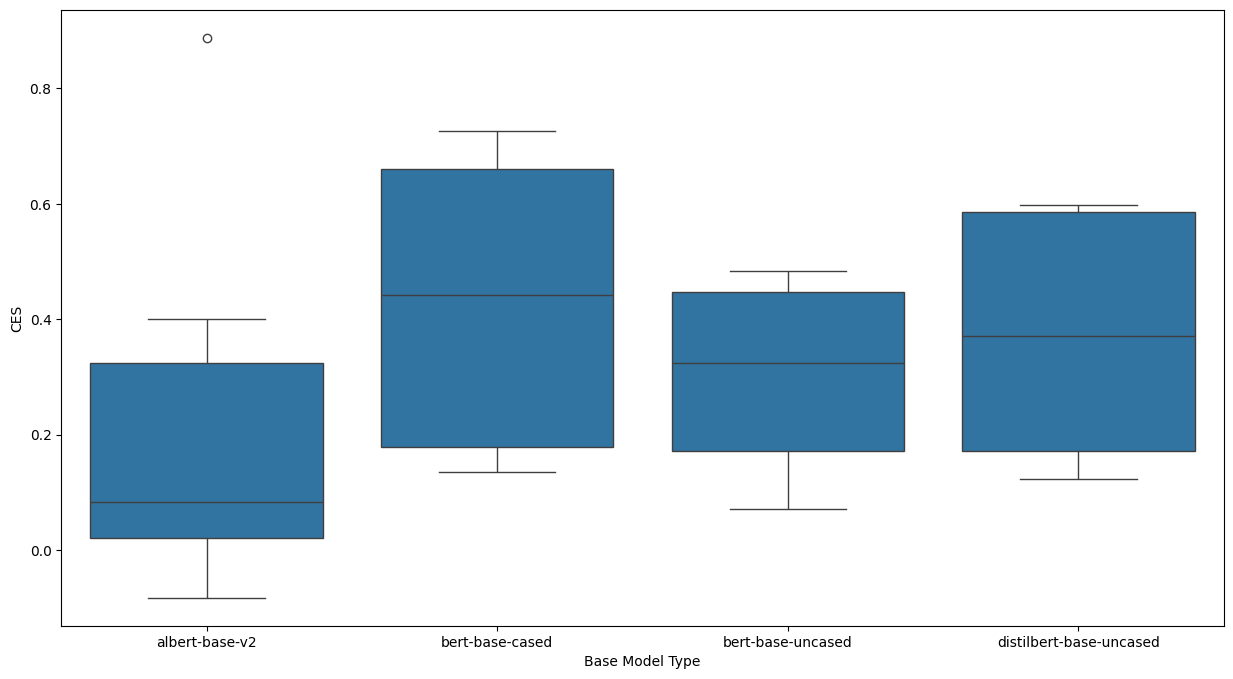

In [117]:
#fig, ax = plt.subplots(figsize=(15, 8))
# sns.boxplot(x='group', y='PES', hue='model_mode', data=ceat, ax = ax)
# ceat.boxplot(column='PES',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='PES', data=ceat.loc[(ceat['group']=='Group_0') & (ceat['ft_epochs'].isin([0,20]))], ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('CES')
# plt.title('Distribution of CES scores with CEAT for different models.')
plt.savefig('../data/results/presentation/ceat_ces_type_overall.png')
plt.savefig("../data/results/presentation/ceat_ces_type_overall.pdf", format="pdf", bbox_inches="tight")

In [118]:
ceat['group'].unique()

array(['Group_0', 'Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5',
       'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11',
       'Group_12', 'Group_13', 'Group_14'], dtype=object)

In [119]:
ceat = ceat.loc[ceat['ft_epochs'].isin([0,20])].sort_values('base_model_tag')
ceat = ceat.rename(columns={'model_id':'Model Setup','PES':'CES'})

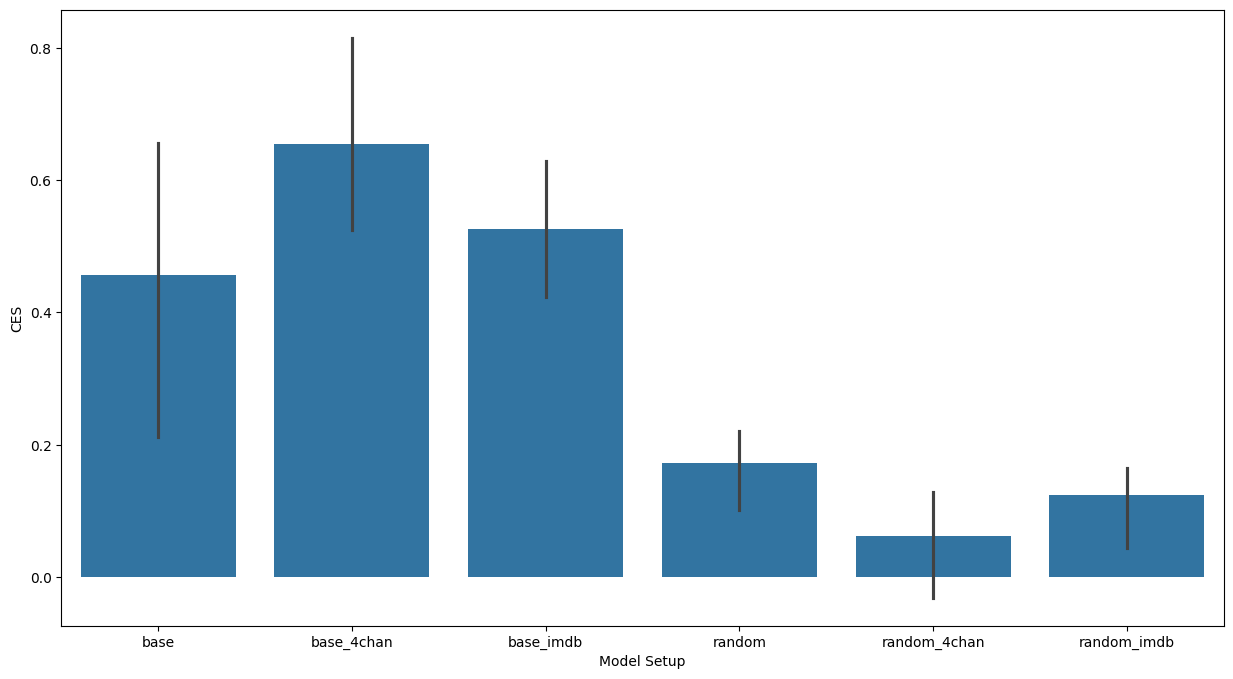

In [120]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_0'])], ax = ax, order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
plt.xlabel('Model Setup')
plt.ylabel('CES')
plt.savefig('../data/results/presentation/ceat_ces_setup_overall.png')
plt.savefig("../data/results/presentation/ceat_ces_setup_overall.pdf", format="pdf", bbox_inches="tight")

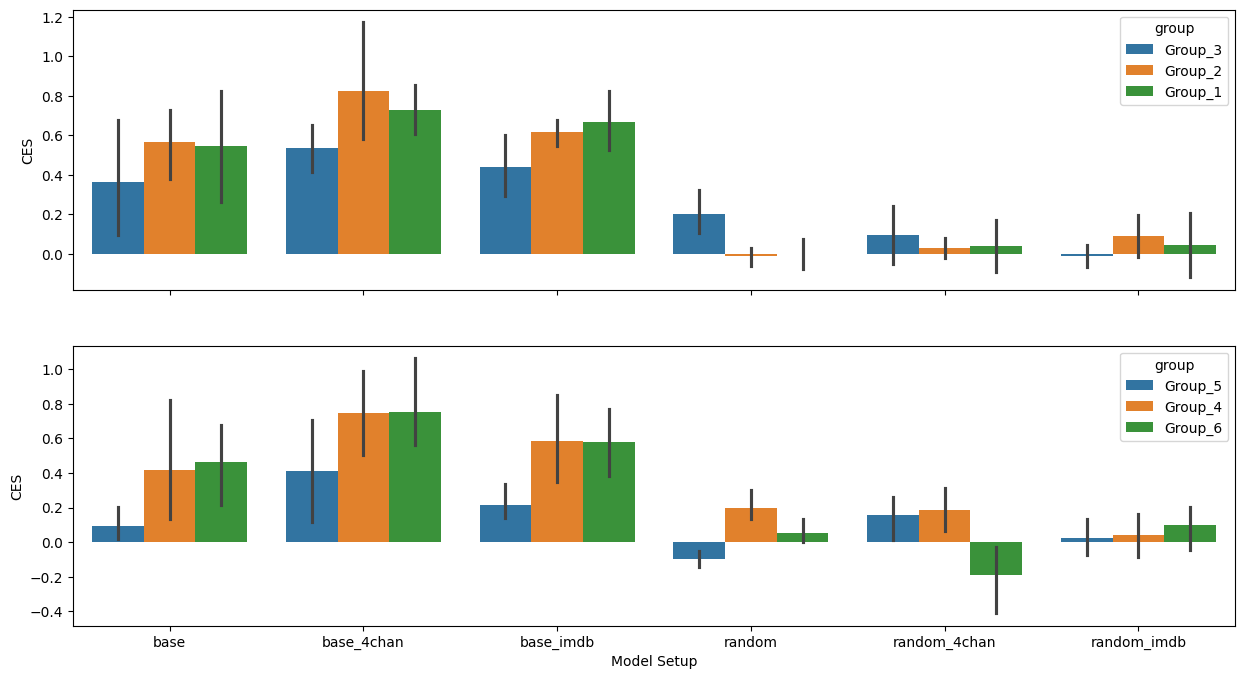

In [121]:
fig, ax = plt.subplots(2,1, figsize=(15, 8),sharex= True)

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_1', 'Group_2', 'Group_3'])], hue = 'group' , ax = ax[0], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_4', 'Group_5', 'Group_6'])], hue = 'group' , ax = ax[1], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.savefig('../data/results/presentation/ceat_ces_setup_1_6.png')
plt.savefig("../data/results/presentation/ceat_ces_setup_1_6.pdf", format="pdf", bbox_inches="tight")
plt.show()

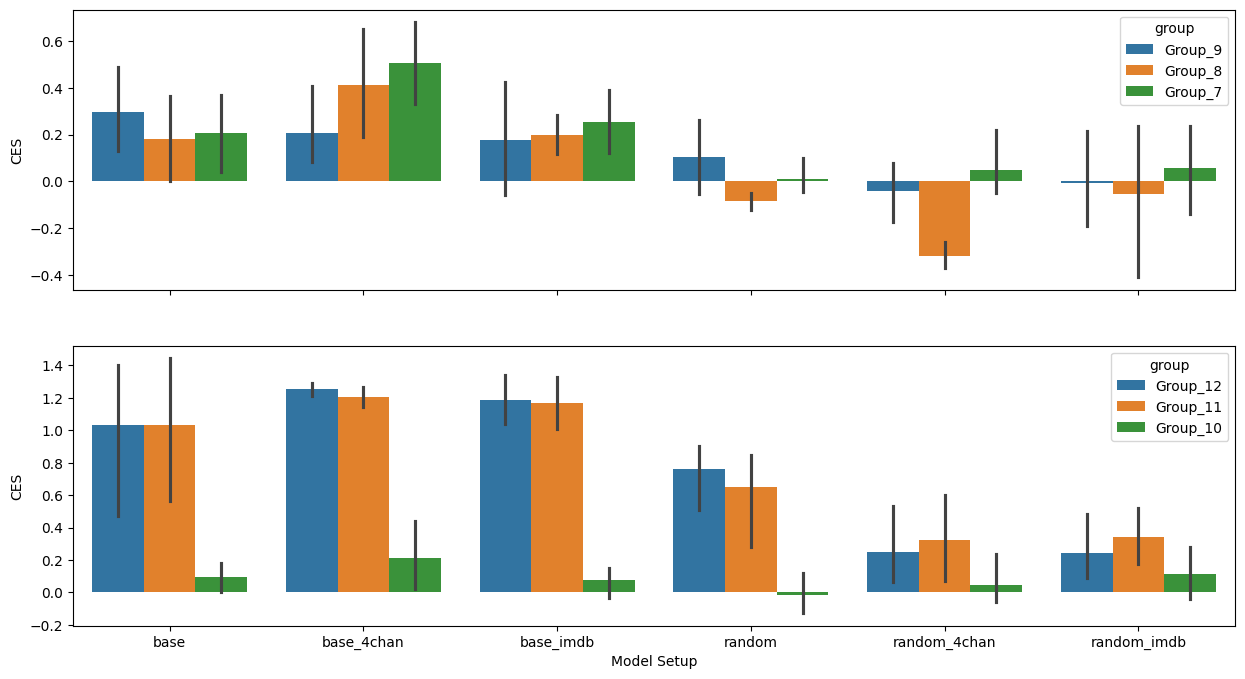

In [122]:
fig, ax = plt.subplots(2,1, figsize=(15, 8),sharex= True)

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_7', 'Group_8', 'Group_9'])], hue = 'group' , ax = ax[0], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_10', 'Group_11', 'Group_12'])], hue = 'group' , ax = ax[1], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.savefig('../data/results/presentation/ceat_ces_setup_7_12.png')
plt.savefig("../data/results/presentation/ceat_ces_setup_7_12.pdf", format="pdf", bbox_inches="tight")
plt.show()

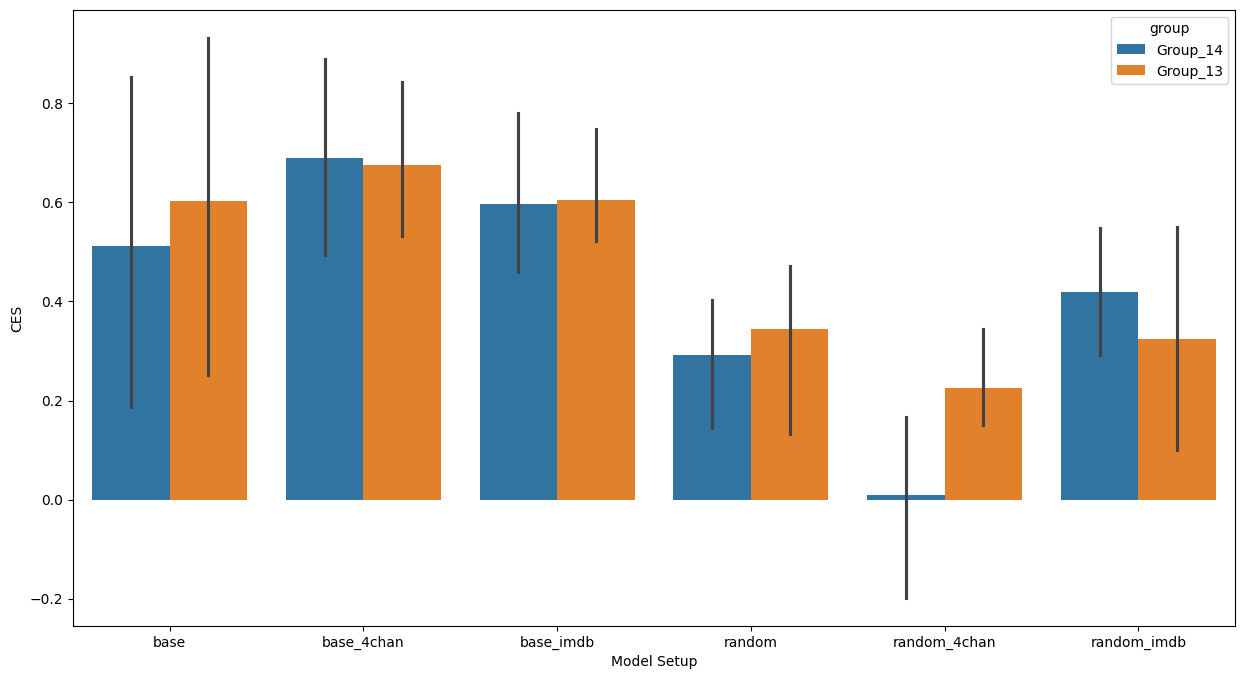

In [123]:
fig, ax = plt.subplots(figsize=(15, 8),sharey= True)

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_13', 'Group_14'])], hue = 'group' , ax = ax, order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# ax.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
plt.savefig('../data/results/presentation/ceat_ces_setup_13_14.png')
plt.savefig("../data/results/presentation/ceat_ces_setup_13_14.pdf", format="pdf", bbox_inches="tight")
plt.show()

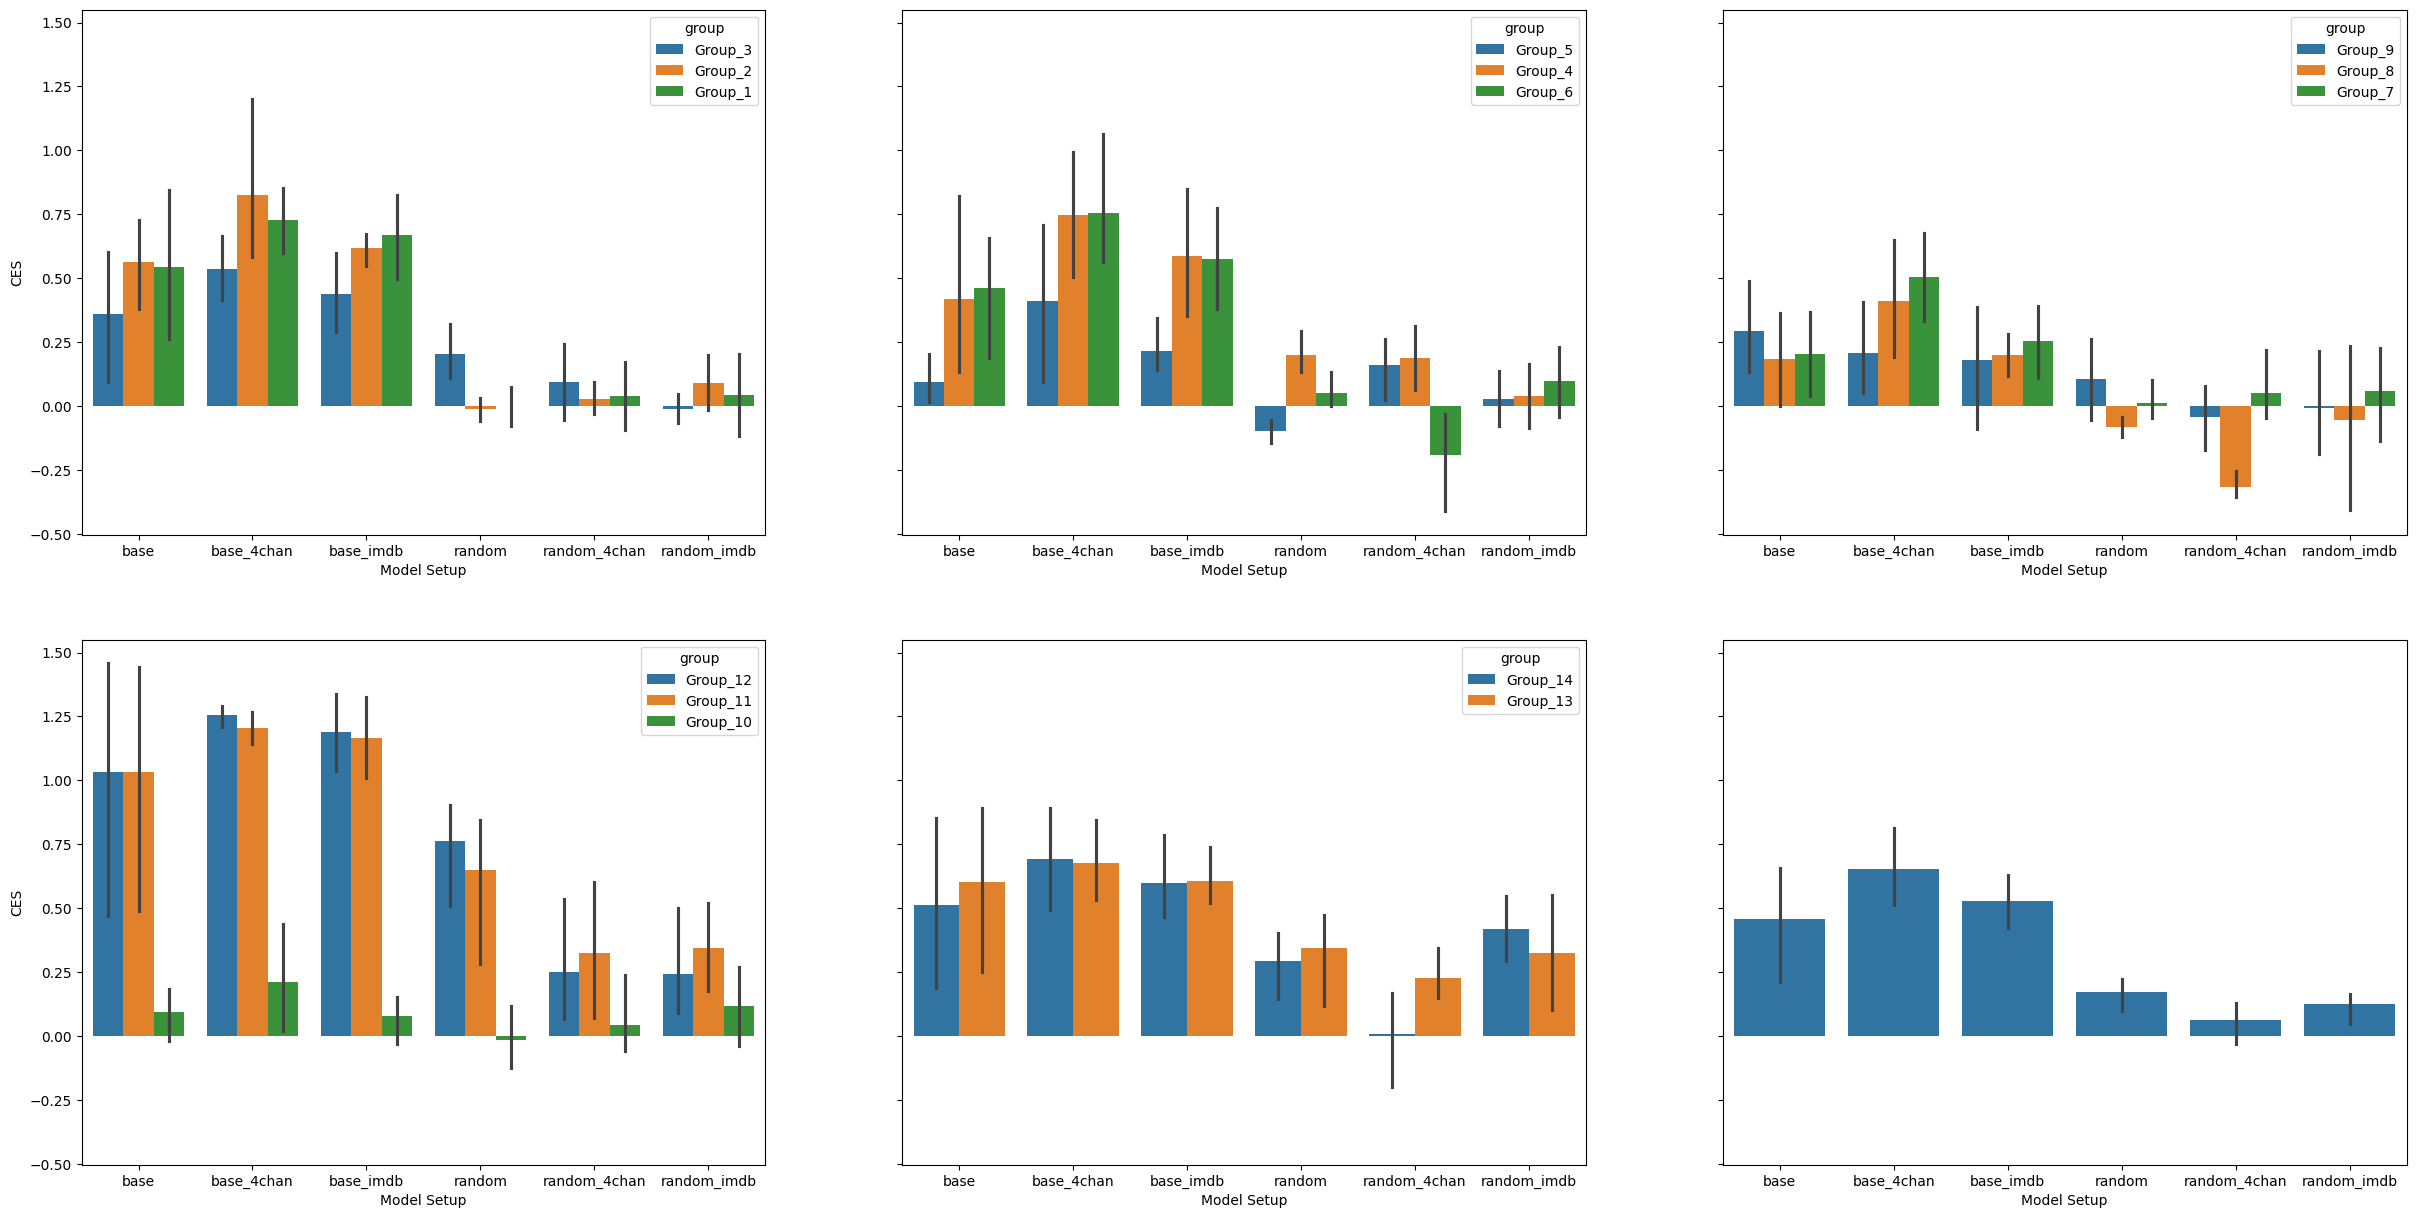

In [124]:
fig, ax = plt.subplots(2,3, figsize=(30, 15),sharey= True)

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_1', 'Group_2', 'Group_3'])], hue = 'group' , ax = ax[0,0], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_4', 'Group_5', 'Group_6'])], hue = 'group' , ax = ax[0,1], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_7', 'Group_8', 'Group_9'])], hue = 'group' , ax = ax[0,2], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_10', 'Group_11', 'Group_12'])], hue = 'group' , ax = ax[1,0], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_13', 'Group_14'])], hue = 'group' , ax = ax[1,1], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_0'])], ax = ax[1,2], order=['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan', 'random_imdb'])
# plt.xlabel('Model Setup')
# plt.ylabel('CES')
# plt.title('')
# fig.suptitle('CES scores for different groups by model setup.', fontsize = 30)
plt.show()

### Epoch Analysis

In [117]:
ceat_cp.loc[ceat_cp['group']=='Group_0']

,model_name,ft_epochs,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0.0,Group_0,0.096925,0.0,albert-base-v2,False,base,None,base
15,albert-base-v2_FT_4chan,5.0,Group_0,0.875832,0.0,albert-base-v2,False,FT,4chan,base_4chan
30,albert-base-v2_FT_4chan,10.0,Group_0,0.864487,0.0,albert-base-v2,False,FT,4chan,base_4chan
45,albert-base-v2_FT_4chan,15.0,Group_0,0.893394,0.0,albert-base-v2,False,FT,4chan,base_4chan
60,albert-base-v2_FT_4chan,20.0,Group_0,0.887854,0.0,albert-base-v2,False,FT,4chan,base_4chan
...,...,...,...,...,...,...,...,...,...,...
1005,distilbert-base-uncased_random_init_FT_4chan,20.0,Group_0,0.123199,0.0,distilbert-base-uncased,True,FT,4chan,random_4chan
1020,distilbert-base-uncased_random_init_FT_imdb,5.0,Group_0,0.242644,0.0,distilbert-base-uncased,True,FT,imdb,random_imdb
1035,distilbert-base-uncased_random_init_FT_imdb,10.0,Group_0,0.185895,0.0,distilbert-base-uncased,True,FT,imdb,random_imdb
1050,distilbert-base-uncased_random_init_FT_imdb,15.0,Group_0,0.159485,0.0,distilbert-base-uncased,True,FT,imdb,random_imdb


In [118]:
rows = ceat_cp.iloc[ceat_cp.loc[ceat_cp['model_id']=='base'].index]
rows['model_id'] = 'base_4chan'
ceat_cp = pd.concat([ceat_cp, rows], ignore_index=True)
rows = ceat_cp.iloc[ceat_cp.loc[ceat_cp['model_id']=='base'].index]
rows['model_id'] = 'base_imdb'
ceat_cp = pd.concat([ceat_cp, rows], ignore_index=True)
rows = ceat_cp.iloc[ceat_cp.loc[ceat_cp['model_id']=='random'].index]
rows['model_id'] = 'random_4chan'
ceat_cp = pd.concat([ceat_cp, rows], ignore_index=True)
rows = ceat_cp.iloc[ceat_cp.loc[ceat_cp['model_id']=='random'].index]
rows['model_id'] = 'random_imdb'
ceat_cp = pd.concat([ceat_cp, rows], ignore_index=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1624435942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_4chan'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1624435942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['model_id'] = 'base_imdb'
C:\Users\Ishan\AppData\Local\Temp\ipykernel_4684\1624435942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

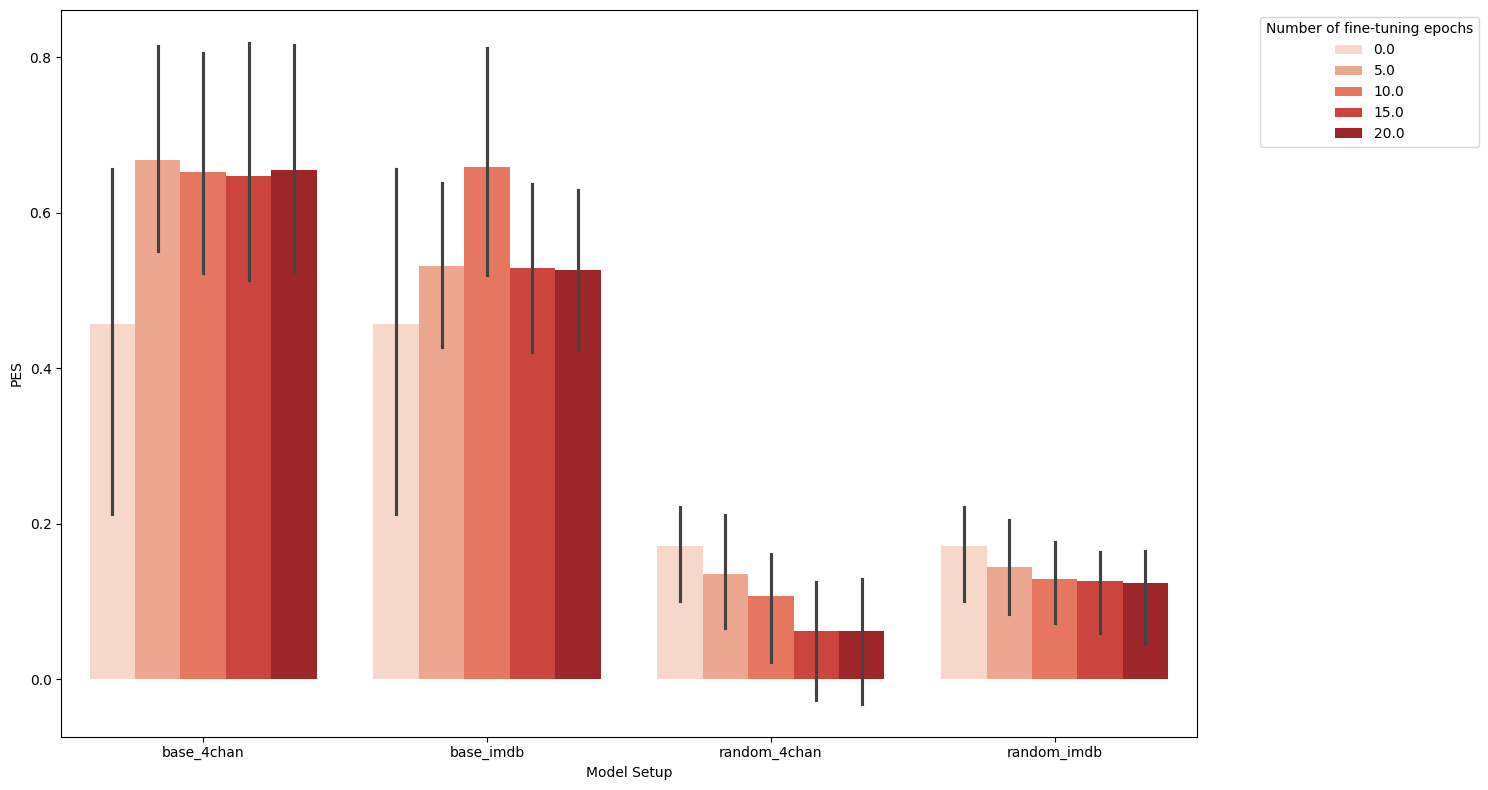

In [121]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='model_id', y='PES', hue='ft_epochs', data=ceat_cp.loc[ceat_cp['group']=='Group_0',['model_id','ft_epochs','PES']], ax=ax, palette=red_palette, order=['base_4chan', 'base_imdb','random_4chan', 'random_imdb'])
plt.xlabel('Model Setup')
plt.ylabel('PES')
# Move legend outside the graph
plt.legend(title='Number of fine-tuning epochs', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Average CrowS-Pairs metric scores for different model setups on fine-tuning.')
plt.tight_layout()
plt.savefig('../data/results/presentation/ceat_epoch_setup.png')
plt.savefig("../data/results/presentation/ceat_epoch_setup.pdf", format="pdf", bbox_inches="tight")

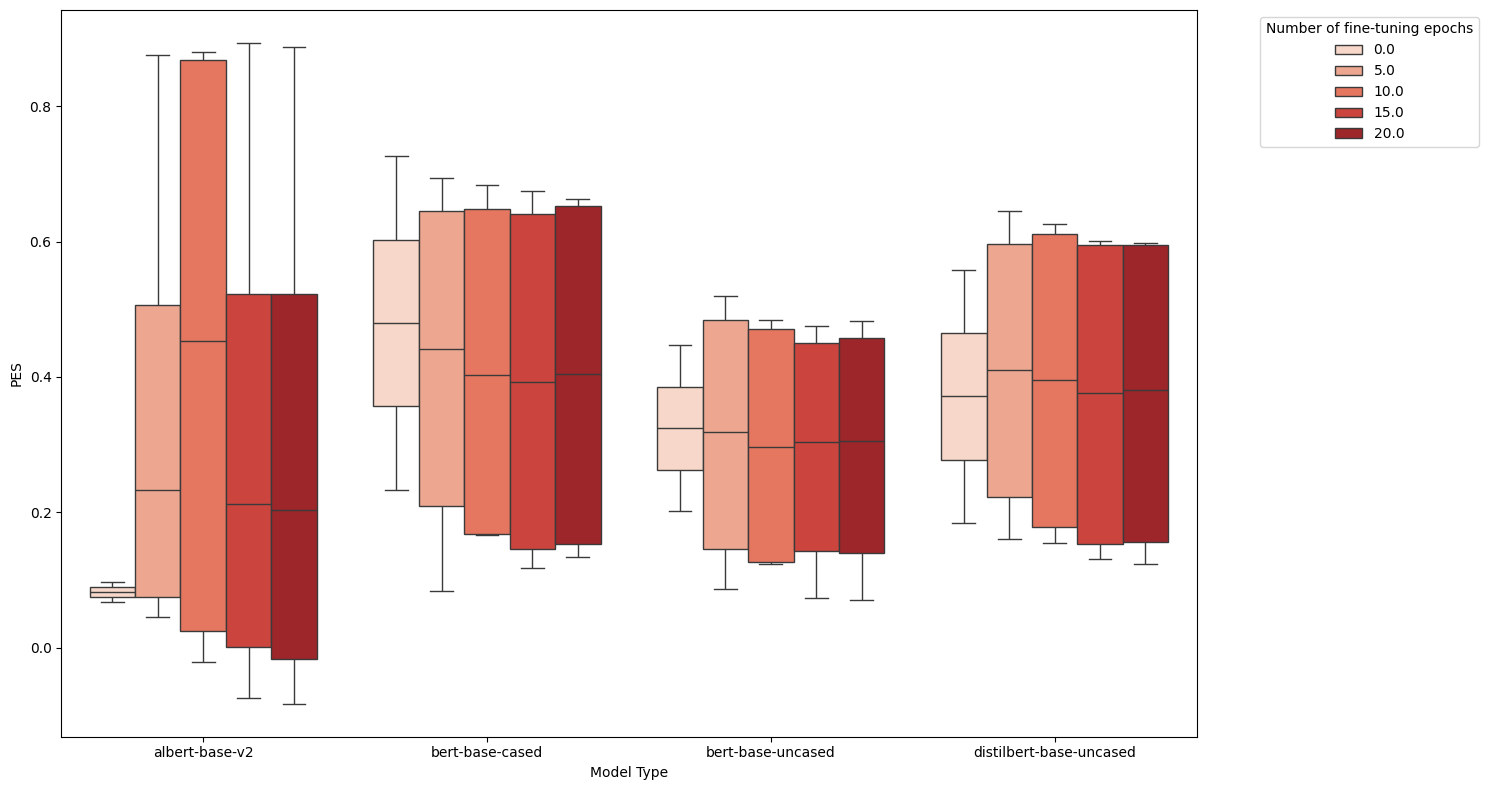

In [127]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='PES', hue = 'ft_epochs', data=ceat_cp.loc[ceat_cp['group']=='Group_0',['base_model_tag','ft_epochs','PES']], ax=ax, palette=red_palette)
plt.xlabel('Model Type')
plt.ylabel('PES')
# Move legend outside the graph
plt.legend(title='Number of fine-tuning epochs', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Average CrowS-Pairs metric scores for different model setups on fine-tuning.')
plt.tight_layout()
plt.savefig('../data/results/presentation/ceat_epoch_type.png')
plt.savefig("../data/results/presentation/ceat_epoch_type.pdf", format="pdf", bbox_inches="tight")

# MODEL METRICS

In [25]:
os.listdir('../data/models/')

['albert-base-v2_FT_4chan_2024-02-09',
 'albert-base-v2_FT_imdb_2024-02-09',
 'bert-base-cased_FT_4chan_2024-02-09',
 'bert-base-cased_FT_imdb_2024-02-09',
 'bert-base-uncased_FT_4chan_2024-02-09',
 'bert-base-uncased_FT_imdb_2024-02-09',
 'distilbert-base-uncased_FT_4chan_2024-02-09',
 'distilbert-base-uncased_FT_imdb_2024-02-09']

In [3]:
with open('../data/models/albert-base-v2_FT_4chan_2024-02-09/checkpoint-3120/trainer_state.json') as f:
    d = json.load(f)

In [16]:
loss_log = []
for log in d['log_history']:
    if('loss' in log.keys()):
        # print(log.keys())
        loss_log.append(log['loss'])
print(loss_log)

[3.1026, 2.6607, 2.5997, 2.5721, 2.5095, 2.4729, 2.4739, 2.4363, 2.4117, 2.399, 2.3885, 2.3649, 2.3627, 2.3502, 2.3476, 2.3316, 2.3252, 2.327, 2.3063, 2.3067]


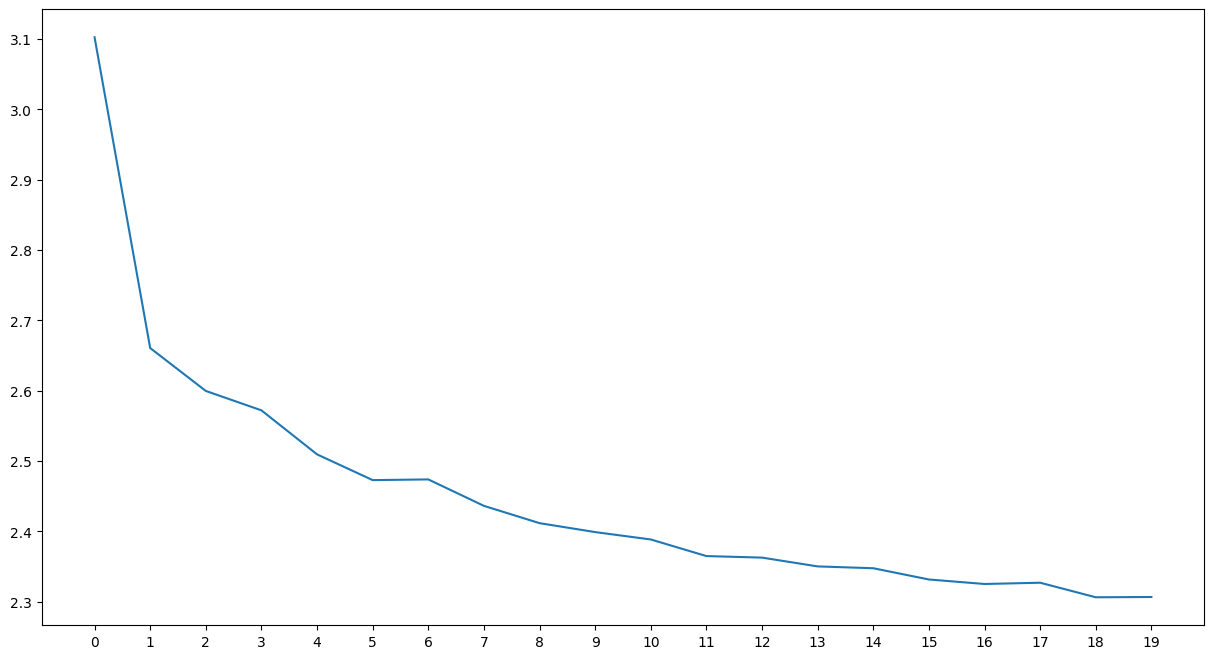

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(loss_log,ax = ax)
ax.set_xticks(range(20))
plt.show()